<a href="https://colab.research.google.com/github/JesunAhmadUshno/Predictive-Analytics-Studies/blob/main/assignment2DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import time

# Set font and plotting style
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("All necessary libraries imported successfully!")


All necessary libraries imported successfully!


In [ ]:
# Read data
print("Reading SAML-D.csv file...")
df = pd.read_csv('SAML-D.csv')

print(f"Data reading completed!")
print(f"Dataset shape: {df.shape}")
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")


Reading SAML-D.csv file...
Data reading completed!
Dataset shape: (9504852, 12)
Dataset contains 9504852 rows and 12 columns


In [ ]:
# View basic data information
print("=== Basic Data Information ===")
print(df.info())
print("\n=== First 5 Rows ===")
print(df.head())
print("\n=== Last 5 Rows ===")
print(df.tail())
print("\n=== Column Names ===")
print(df.columns.tolist())
print("\n=== Data Types ===")
print(df.dtypes)


=== Basic Data Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504852 entries, 0 to 9504851
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Time                    object 
 1   Date                    object 
 2   Sender_account          int64  
 3   Receiver_account        int64  
 4   Amount                  float64
 5   Payment_currency        object 
 6   Received_currency       object 
 7   Sender_bank_location    object 
 8   Receiver_bank_location  object 
 9   Payment_type            object 
 10  Is_laundering           int64  
 11  Laundering_type         object 
dtypes: float64(1), int64(3), object(8)
memory usage: 870.2+ MB
None

=== First 5 Rows ===
       Time        Date  Sender_account  Receiver_account    Amount  \
0  10:35:19  2022-10-07      8724731955        2769355426   1459.15   
1  10:35:20  2022-10-07      1491989064        8401255335   6019.64   
2  10:35:20  2022-10-07       2873

In [ ]:
# View descriptive statistics
print("=== Descriptive Statistics for Numeric Variables ===")
print(df.describe())

print("\n=== Descriptive Statistics for Categorical Variables ===")
print(df.describe(include=['object']))


=== Descriptive Statistics for Numeric Variables ===
       Sender_account  Receiver_account        Amount  Is_laundering
count    9.504852e+06      9.504852e+06  9.504852e+06   9.504852e+06
mean     5.006619e+09      5.006006e+09  8.762968e+03   1.038733e-03
std      2.885814e+09      2.884763e+09  2.561495e+04   3.221263e-02
min      9.018000e+03      9.018000e+03  3.730000e+00   0.000000e+00
25%      2.513133e+09      2.513219e+09  2.143688e+03   0.000000e+00
50%      5.001017e+09      5.002572e+09  6.113720e+03   0.000000e+00
75%      7.505051e+09      7.502397e+09  1.045846e+04   0.000000e+00
max      9.999987e+09      9.999971e+09  1.261850e+07   1.000000e+00

=== Descriptive Statistics for Categorical Variables ===
            Time        Date Payment_currency Received_currency  \
count    9504852     9504852          9504852           9504852   
unique     86400         321               13                13   
top     15:22:42  2023-02-09        UK pounds         UK pounds   


In [ ]:
# Check missing values
print("=== Missing Values Check ===")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Column_Name': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
}).sort_values('Missing_Count', ascending=False)

print(missing_df[missing_df['Missing_Count'] > 0])

if missing_df['Missing_Count'].sum() == 0:
    print("✅ No missing values in the dataset!")
else:
    print(f"⚠️  Total missing values: {missing_df['Missing_Count'].sum()}")


=== Missing Values Check ===
Empty DataFrame
Columns: [Column_Name, Missing_Count, Missing_Percentage]
Index: []
✅ No missing values in the dataset!


In [ ]:
# Check duplicate values
print("=== Duplicate Values Check ===")
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

if duplicate_rows > 0:
    print(f"⚠️  Found {duplicate_rows} duplicate rows")
    print("Duplicate data preview:")
    print(df[df.duplicated()].head())
else:
    print("✅ No duplicate rows in the dataset!")


=== Duplicate Values Check ===
Number of duplicate rows: 0
✅ No duplicate rows in the dataset!


In [ ]:
# Check outliers (using IQR method for numeric columns)
print("=== Outlier Check (using IQR method) ===")
numeric_columns = df.select_dtypes(include=[np.number]).columns

outliers_info = []
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_count = len(outliers)

    if outliers_count > 0:
        outliers_info.append({
            'Column_Name': col,
            'Outliers_Count': outliers_count,
            'Outliers_Percentage': (outliers_count / len(df)) * 100,
            'Lower_Bound': lower_bound,
            'Upper_Bound': upper_bound
        })

if outliers_info:
    outliers_df = pd.DataFrame(outliers_info)
    print(outliers_df)
else:
    print("✅ No obvious outliers found using IQR method!")


=== Outlier Check (using IQR method) ===
     Column_Name  Outliers_Count  Outliers_Percentage  Lower_Bound  \
0         Amount          429848             4.522406   -10328.475   
1  Is_laundering            9873             0.103873        0.000   

   Upper_Bound  
0    22930.625  
1        0.000  


In [ ]:
# Create data copy for cleaning
df_cleaned = df.copy()
print(f"Starting data cleaning, original data shape: {df_cleaned.shape}")

# 1. Handle duplicate values
initial_rows = len(df_cleaned)
df_cleaned = df_cleaned.drop_duplicates()
removed_duplicates = initial_rows - len(df_cleaned)
print(f"✅ Removed duplicates: {removed_duplicates} rows")

# 2. Handle missing values
# For numeric columns: fill with median
# For categorical columns: fill with mode
for col in df_cleaned.columns:
    if df_cleaned[col].isnull().sum() > 0:
        if df_cleaned[col].dtype in ['int64', 'float64']:
            df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())
            print(f"✅ Numeric column '{col}' filled with median")
        else:
            mode_value = df_cleaned[col].mode()
            if len(mode_value) > 0:
                df_cleaned[col] = df_cleaned[col].fillna(mode_value[0])
                print(f"✅ Categorical column '{col}' filled with mode")
            else:
                df_cleaned[col] = df_cleaned[col].fillna('Unknown')
                print(f"✅ Categorical column '{col}' filled with 'Unknown'")


Starting data cleaning, original data shape: (9504852, 12)
✅ Removed duplicates: 0 rows


In [ ]:
# 3. Handle outliers (based on IQR method with mild treatment)
# For outliers, we use caps method (limit to reasonable range) instead of direct deletion
# Note: Exclude identifier field Is_laundering, which is a binary identifier (0/1) and should not be treated as continuous variable
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns

# Exclude fields that should not undergo outlier treatment
excluded_columns = ['Is_laundering']  # Money laundering identifier field, should maintain original values
numeric_columns_for_outlier_treatment = [col for col in numeric_columns if col not in excluded_columns]

print(f"Total numeric fields: {len(numeric_columns)}")
print(f"Fields for outlier treatment after excluding identifier fields: {numeric_columns_for_outlier_treatment}")
print(f"Excluded fields: {excluded_columns}")
print("-" * 50)

for col in numeric_columns_for_outlier_treatment:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Calculate outlier count
    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
    outliers_count = len(outliers)

    if outliers_count > 0:
        # Use caps method to handle outliers
        df_cleaned[col] = df_cleaned[col].clip(lower=lower_bound, upper=upper_bound)
        print(f"✅ Column '{col}' processed {outliers_count} outliers (caps method)")

# Verify Is_laundering field remains unchanged
print(f"\n🔍 Verify Is_laundering field maintains original state:")
print(f"Is_laundering unique values: {sorted(df_cleaned['Is_laundering'].unique())}")
print(f"Is_laundering distribution: {df_cleaned['Is_laundering'].value_counts().to_dict()}")

print(f"\nData cleaning completed! Cleaned data shape: {df_cleaned.shape}")

# Verify cleaning results
print("\n=== Post-cleaning Data Quality Check ===")
print(f"Missing values: {df_cleaned.isnull().sum().sum()}")
print(f"Duplicate values: {df_cleaned.duplicated().sum()}")


Total numeric fields: 4
Fields for outlier treatment after excluding identifier fields: ['Sender_account', 'Receiver_account', 'Amount']
Excluded fields: ['Is_laundering']
--------------------------------------------------
✅ Column 'Amount' processed 429848 outliers (caps method)

🔍 Verify Is_laundering field maintains original state:
Is_laundering unique values: [np.int64(0), np.int64(1)]
Is_laundering distribution: {0: 9494979, 1: 9873}

Data cleaning completed! Cleaned data shape: (9504852, 12)

=== Post-cleaning Data Quality Check ===
Missing values: 0
Duplicate values: 5


In [ ]:
# Check data variability (to resolve KDE plotting issues)
print("=== Data Variability Check ===")
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns

variability_issues = []
for col in numeric_columns:
    unique_values = df_cleaned[col].nunique()
    std_value = df_cleaned[col].std()
    min_val = df_cleaned[col].min()
    max_val = df_cleaned[col].max()

    issue_type = None
    if unique_values == 1:
        issue_type = "Constant column (all values identical)"
    elif std_value < 1e-10:
        issue_type = "Near-zero variance"
    elif unique_values < 3:
        issue_type = "Too few unique values"

    if issue_type:
        variability_issues.append({
            'Column_Name': col,
            'Issue_Type': issue_type,
            'Unique_Count': unique_values,
            'Standard_Deviation': std_value,
            'Minimum_Value': min_val,
            'Maximum_Value': max_val
        })

if variability_issues:
    print("⚠️  Found data variability issues (may affect KDE plotting):")
    issues_df = pd.DataFrame(variability_issues)
    print(issues_df)
    print("\nKDE density curves for these columns will be skipped, showing only histograms.")
else:
    print("✅ All numeric columns have sufficient variability for normal KDE curve plotting.")


=== Data Variability Check ===
⚠️  Found data variability issues (may affect KDE plotting):
     Column_Name             Issue_Type  Unique_Count  Standard_Deviation  \
0  Is_laundering  Too few unique values             2            0.032213   

   Minimum_Value  Maximum_Value  
0              0              1  

KDE density curves for these columns will be skipped, showing only histograms.


In [ ]:
# Statistical summary table version (fastest)
def quick_numeric_summary(df):
    """
    Generate quick statistical summary table for numeric variables
    """
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    if len(numeric_columns) == 0:
        print("No numeric variables found")
        return

    print(f"Numeric Variable Statistical Summary (total {len(numeric_columns)} variables):")
    print("=" * 80)

    # Generate descriptive statistics
    summary_stats = df[numeric_columns].describe().T

    # Add additional statistical information
    summary_stats['Missing_Count'] = df[numeric_columns].isnull().sum()
    summary_stats['Missing_Rate(%)'] = (df[numeric_columns].isnull().sum() / len(df) * 100).round(2)
    summary_stats['Skewness'] = df[numeric_columns].skew().round(3)
    summary_stats['Kurtosis'] = df[numeric_columns].kurtosis().round(3)

    # Rearrange column order
    cols_order = ['count', 'Missing_Count', 'Missing_Rate(%)', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'Skewness', 'Kurtosis']
    summary_stats = summary_stats[cols_order]

    # Rename columns
    summary_stats.columns = ['Data_Count', 'Missing_Values', 'Missing_Rate(%)', 'Mean', 'Std_Dev', 'Minimum',
                           'Q1_25%', 'Median', 'Q3_75%', 'Maximum', 'Skewness', 'Kurtosis']

    display(summary_stats.round(3))

    return summary_stats


# Fastest statistical summary (recommended for initial analysis)
print("=== Statistical Summary Table (Fastest) ===")
summary_result = quick_numeric_summary(df_cleaned)


=== Statistical Summary Table (Fastest) ===
Numeric Variable Statistical Summary (total 4 variables):


,Data_Count,Missing_Values,Missing_Rate(%),Mean,Std_Dev,Minimum,Q1_25%,Median,Q3_75%,Maximum,Skewness,Kurtosis
Sender_account,9504852.0,0,0.0,5.006619e+09,2.885814e+09,9018.00,2.513133e+09,5.001017e+09,7.505051e+09,9.999987e+09,-0.001,-1.195
Receiver_account,9504852.0,0,0.0,5.006006e+09,2.884763e+09,9018.00,2.513219e+09,5.002572e+09,7.502397e+09,9.999971e+09,-0.002,-1.197
Amount,9504852.0,0,0.0,7.350440e+03,6.150589e+03,3.73,2.143688e+03,6.113720e+03,1.045846e+04,2.293062e+04,0.960,0.260
Is_laundering,9504852.0,0,0.0,1.000000e-03,3.200000e-02,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,30.979,957.713


Detected 4 numeric variables
Large dataset (9504852 rows), sampling 10000 rows for visualization


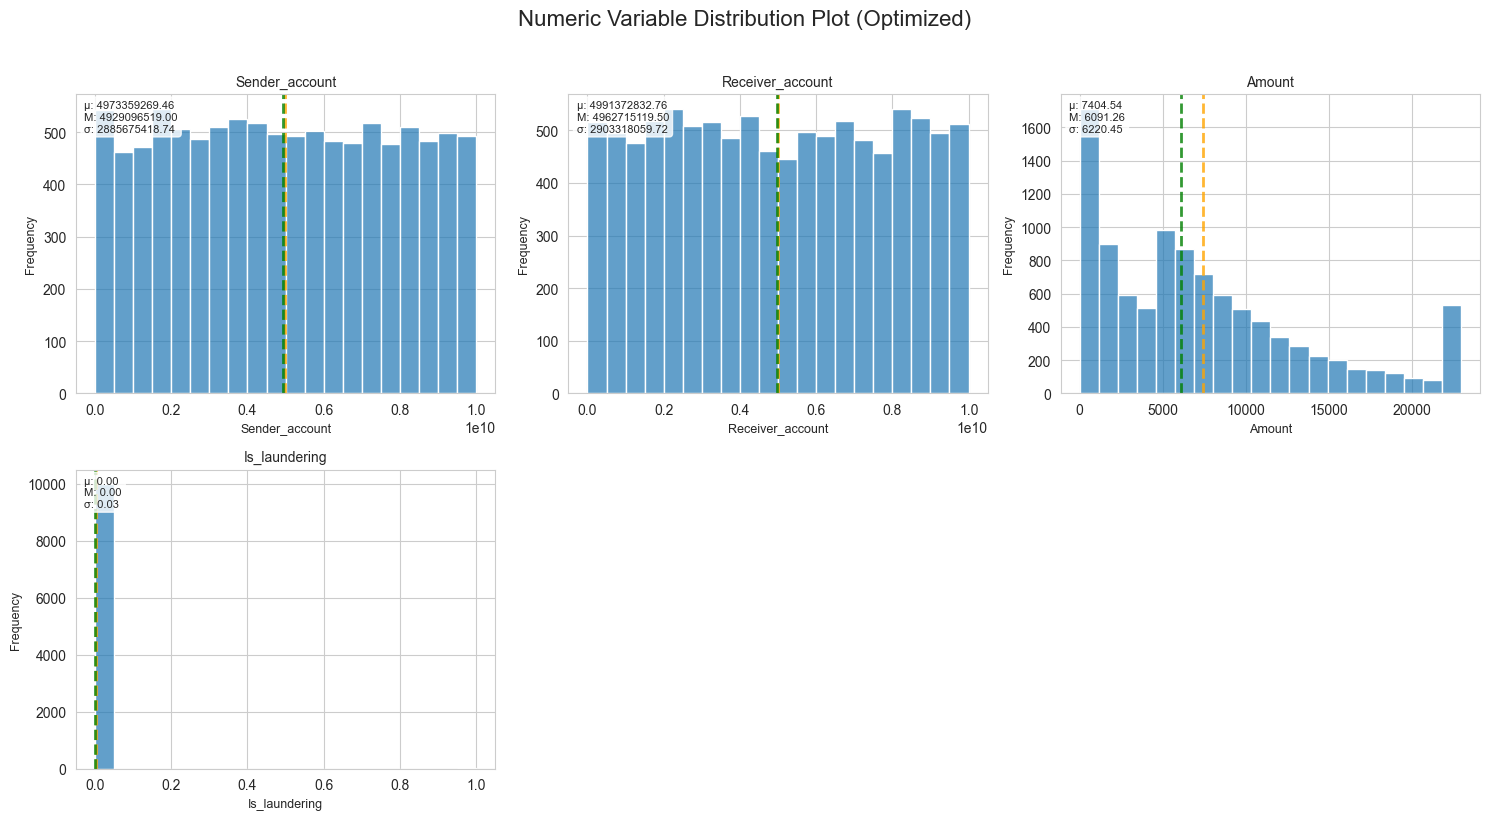

Visualization completed, time elapsed: 0.89 seconds


In [ ]:
# Optimized numeric variable distribution visualization
def plot_numeric_distributions_fast(df, sample_size=10000, max_vars=12):
    """
    Optimized numeric variable distribution visualization function

    Parameters:
    - df: DataFrame
    - sample_size: Sample size for large datasets
    - max_vars: Maximum number of variables to display
    """

    numeric_columns = df.select_dtypes(include=[np.number]).columns
    print(f"Detected {len(numeric_columns)} numeric variables")

    # Limit number of variables
    if len(numeric_columns) > max_vars:
        print(f"Too many variables, showing only first {max_vars} variables")
        numeric_columns = numeric_columns[:max_vars]

    if len(numeric_columns) == 0:
        print("No numeric variables available for visualization")
        return

    # Data sampling (if dataset is large)
    if len(df) > sample_size:
        print(f"Large dataset ({len(df)} rows), sampling {sample_size} rows for visualization")
        df_sample = df.sample(n=sample_size, random_state=42)
    else:
        df_sample = df.copy()

    n_vars = len(numeric_columns)
    n_cols = min(3, n_vars)
    n_rows = (n_vars + n_cols - 1) // n_cols

    start_time = time.time()

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    fig.suptitle('Numeric Variable Distribution Plot (Optimized)', fontsize=16, y=1.02)

    # Ensure axes is a 2D array
    if n_rows == 1:
        axes = axes.reshape(1, -1) if n_vars > 1 else [axes]
    if n_cols == 1:
        axes = axes.reshape(-1, 1)

    for i, col in enumerate(numeric_columns):
        if n_vars == 1:
            ax = axes
        else:
            row = i // n_cols
            col_idx = i % n_cols
            ax = axes[row, col_idx] if n_rows > 1 else axes[col_idx]

        # Use seaborn's histplot for better efficiency
        try:
            import seaborn as sns
            sns.histplot(data=df_sample, x=col, bins=20, kde=False, ax=ax, alpha=0.7)
        except:
            # Fallback: simplified matplotlib histogram
            ax.hist(df_sample[col], bins=20, alpha=0.7, color='skyblue')

        # Add statistical information
        mean_val = df_sample[col].mean()
        median_val = df_sample[col].median()
        std_val = df_sample[col].std()

        ax.axvline(mean_val, color='orange', linestyle='--', alpha=0.8, linewidth=2)
        ax.axvline(median_val, color='green', linestyle='--', alpha=0.8, linewidth=2)

        ax.set_title(f'{col}', fontsize=10)
        ax.set_xlabel(col, fontsize=9)
        ax.set_ylabel('Frequency', fontsize=9)

        # Simplified statistical information
        stats_text = f'μ: {mean_val:.2f}\nM: {median_val:.2f}\nσ: {std_val:.2f}'
        ax.text(0.02, 0.98, stats_text, transform=ax.transAxes,
                verticalalignment='top', fontsize=8,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Hide extra subplots
    if n_vars > 1:
        for i in range(n_vars, n_rows * n_cols):
            row = i // n_cols
            col_idx = i % n_cols
            if n_rows > 1:
                axes[row, col_idx].set_visible(False)
            else:
                axes[col_idx].set_visible(False)

    plt.tight_layout()
    plt.show()

    end_time = time.time()
    print(f"Visualization completed, time elapsed: {end_time - start_time:.2f} seconds")

# Use optimized version
plot_numeric_distributions_fast(df_cleaned)


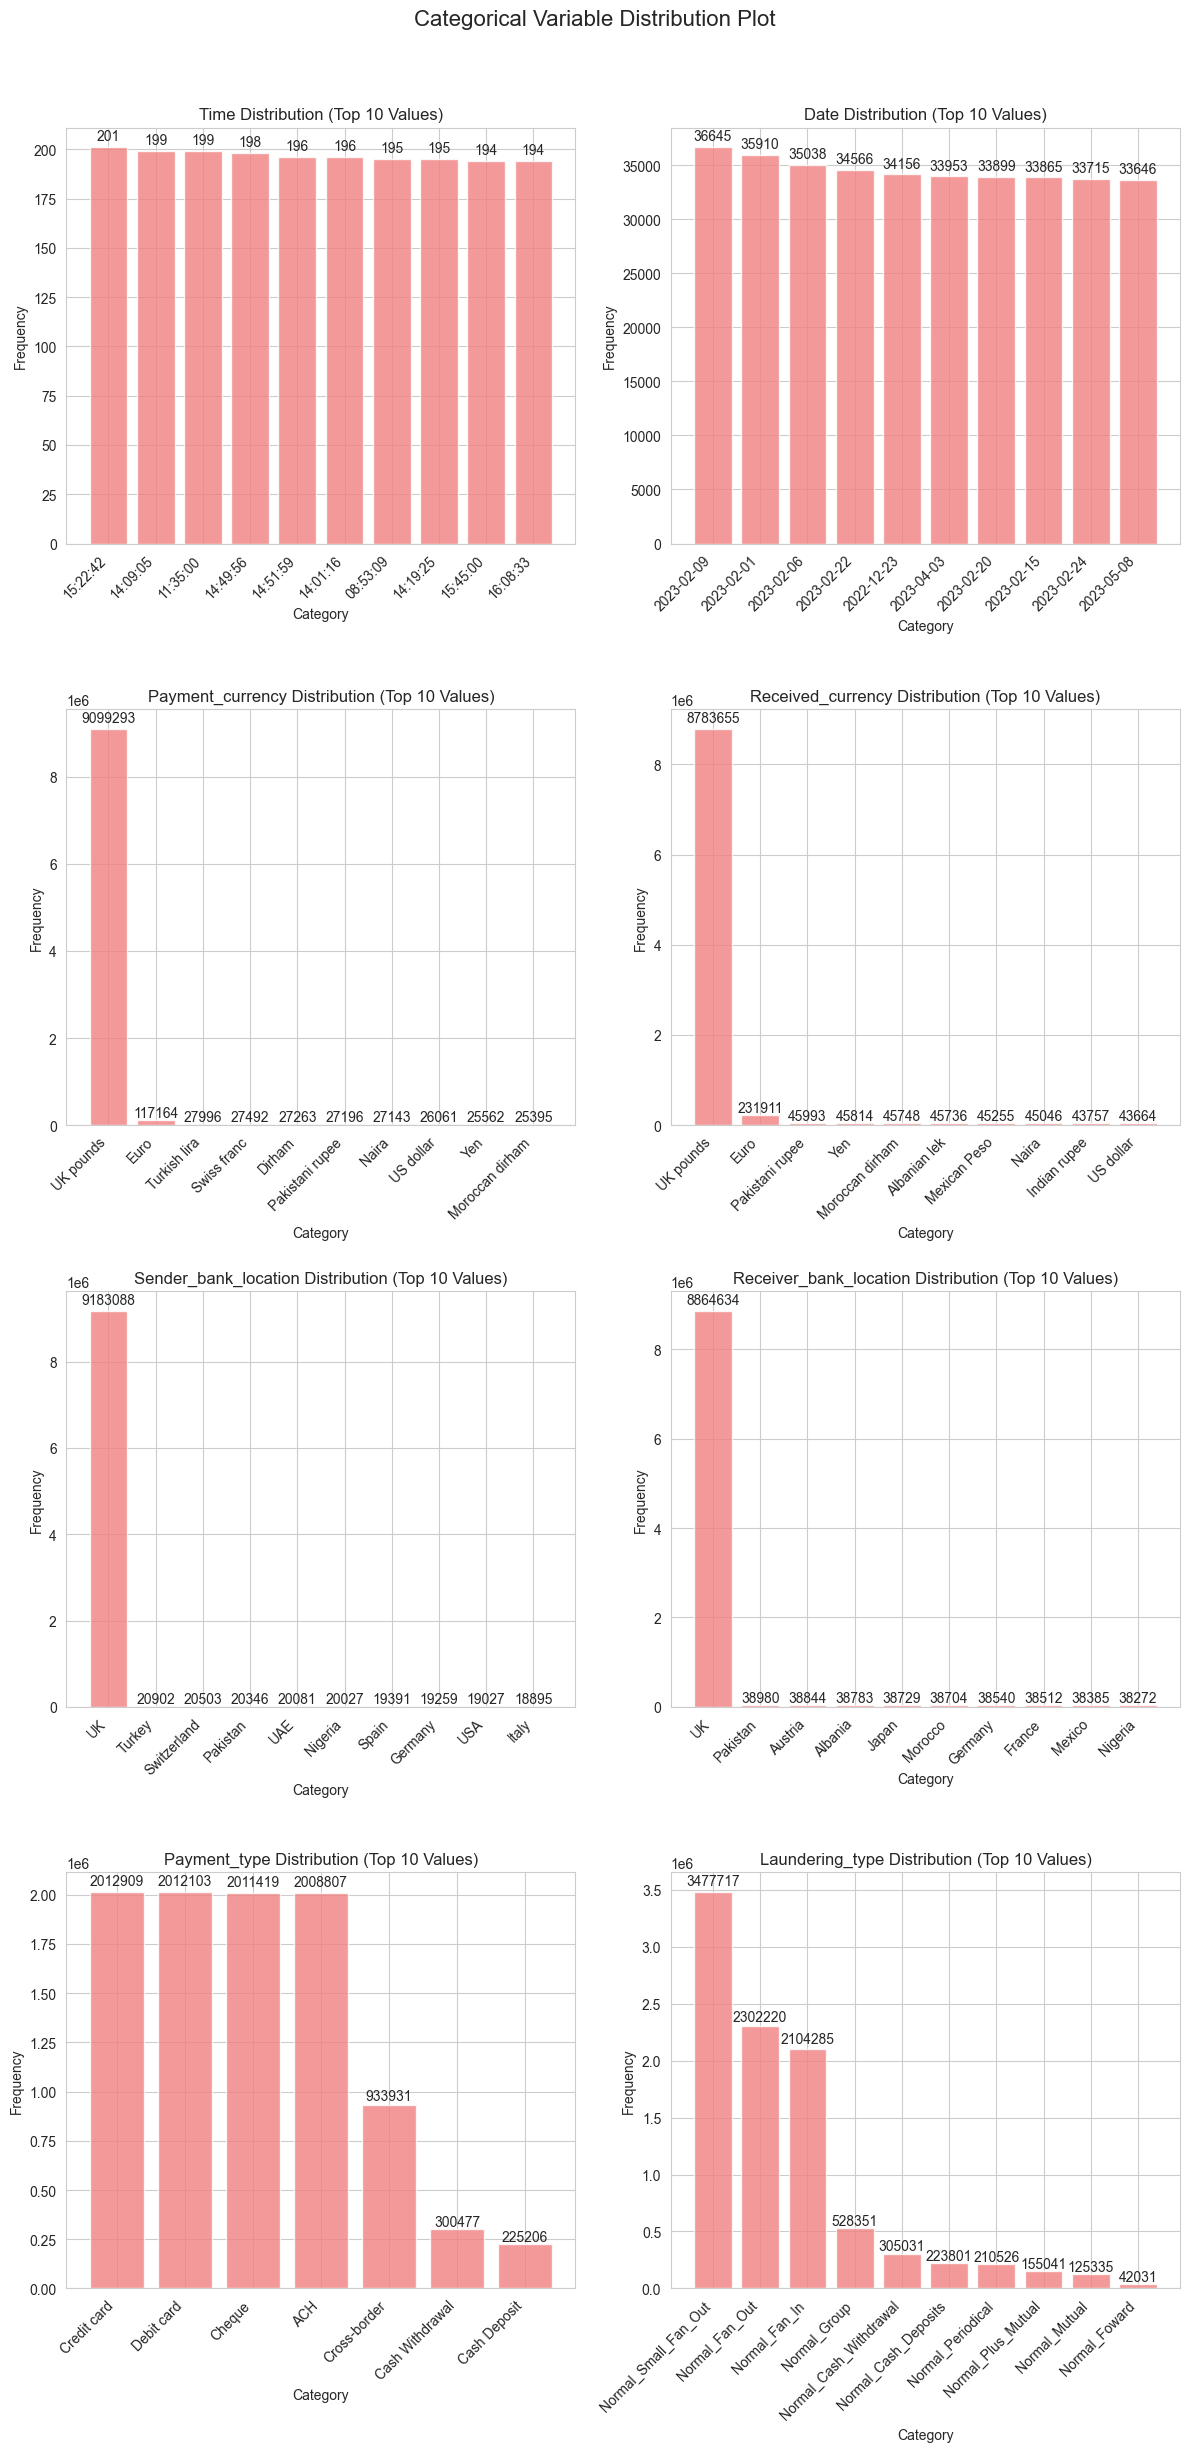

In [ ]:
# Categorical variable distribution visualization
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
n_categorical = len(categorical_columns)

if n_categorical > 0:
    # Calculate subplot layout
    n_cols = min(2, n_categorical)
    n_rows = (n_categorical + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6*n_rows))
    fig.suptitle('Categorical Variable Distribution Plot', fontsize=16, y=1.02)

    # Ensure axes is a 2D array
    if n_rows == 1 and n_cols == 1:
        axes = np.array([[axes]])
    elif n_rows == 1:
        axes = axes.reshape(1, -1)
    elif n_cols == 1:
        axes = axes.reshape(-1, 1)

    for i, col in enumerate(categorical_columns):
        row = i // n_cols
        col_idx = i % n_cols
        ax = axes[row, col_idx]

        # Get value counts, limit to top 10
        value_counts = df_cleaned[col].value_counts().head(10)

        # Plot bar chart
        bars = ax.bar(range(len(value_counts)), value_counts.values, color='lightcoral', alpha=0.8)
        ax.set_title(f'{col} Distribution (Top 10 Values)')
        ax.set_xlabel('Category')
        ax.set_ylabel('Frequency')
        ax.set_xticks(range(len(value_counts)))
        ax.set_xticklabels(value_counts.index, rotation=45, ha='right')

        # Add value labels
        for j, bar in enumerate(bars):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                   f'{int(height)}', ha='center', va='bottom')

    # Hide extra subplots
    for i in range(n_categorical, n_rows * n_cols):
        row = i // n_cols
        col_idx = i % n_cols
        axes[row, col_idx].set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No categorical variables available for visualization")


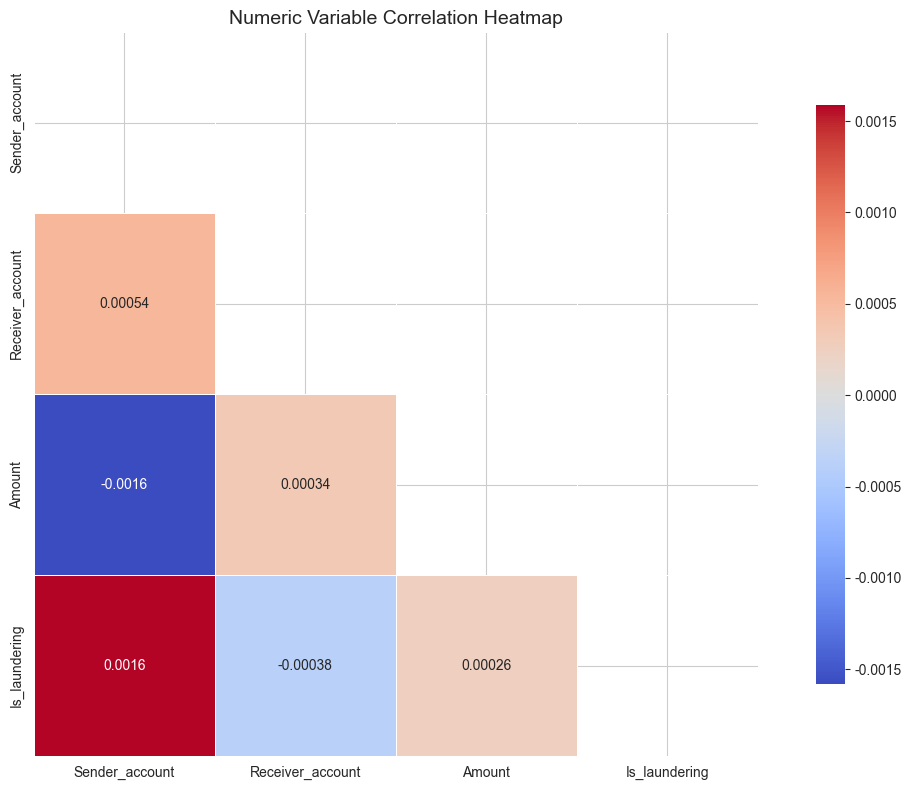

=== Strong Correlation Pairs (|Correlation| > 0.7) ===
No strong correlation pairs found


In [ ]:
# Numeric variable correlation analysis
if len(numeric_columns) > 1:
    plt.figure(figsize=(12, 8))
    correlation_matrix = df_cleaned[numeric_columns].corr()

    # Create heatmap
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": .8})
    plt.title('Numeric Variable Correlation Heatmap', fontsize=14)
    plt.tight_layout()
    plt.show()

    # Show strong correlation pairs (absolute value > 0.7)
    print("=== Strong Correlation Pairs (|Correlation| > 0.7) ===")
    strong_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.7:
                strong_corr_pairs.append({
                    'Variable_1': correlation_matrix.columns[i],
                    'Variable_2': correlation_matrix.columns[j],
                    'Correlation_Coefficient': corr_val
                })

    if strong_corr_pairs:
        strong_corr_df = pd.DataFrame(strong_corr_pairs)
        print(strong_corr_df)
    else:
        print("No strong correlation pairs found")
else:
    print("Less than 2 numeric variables, correlation analysis not possible")


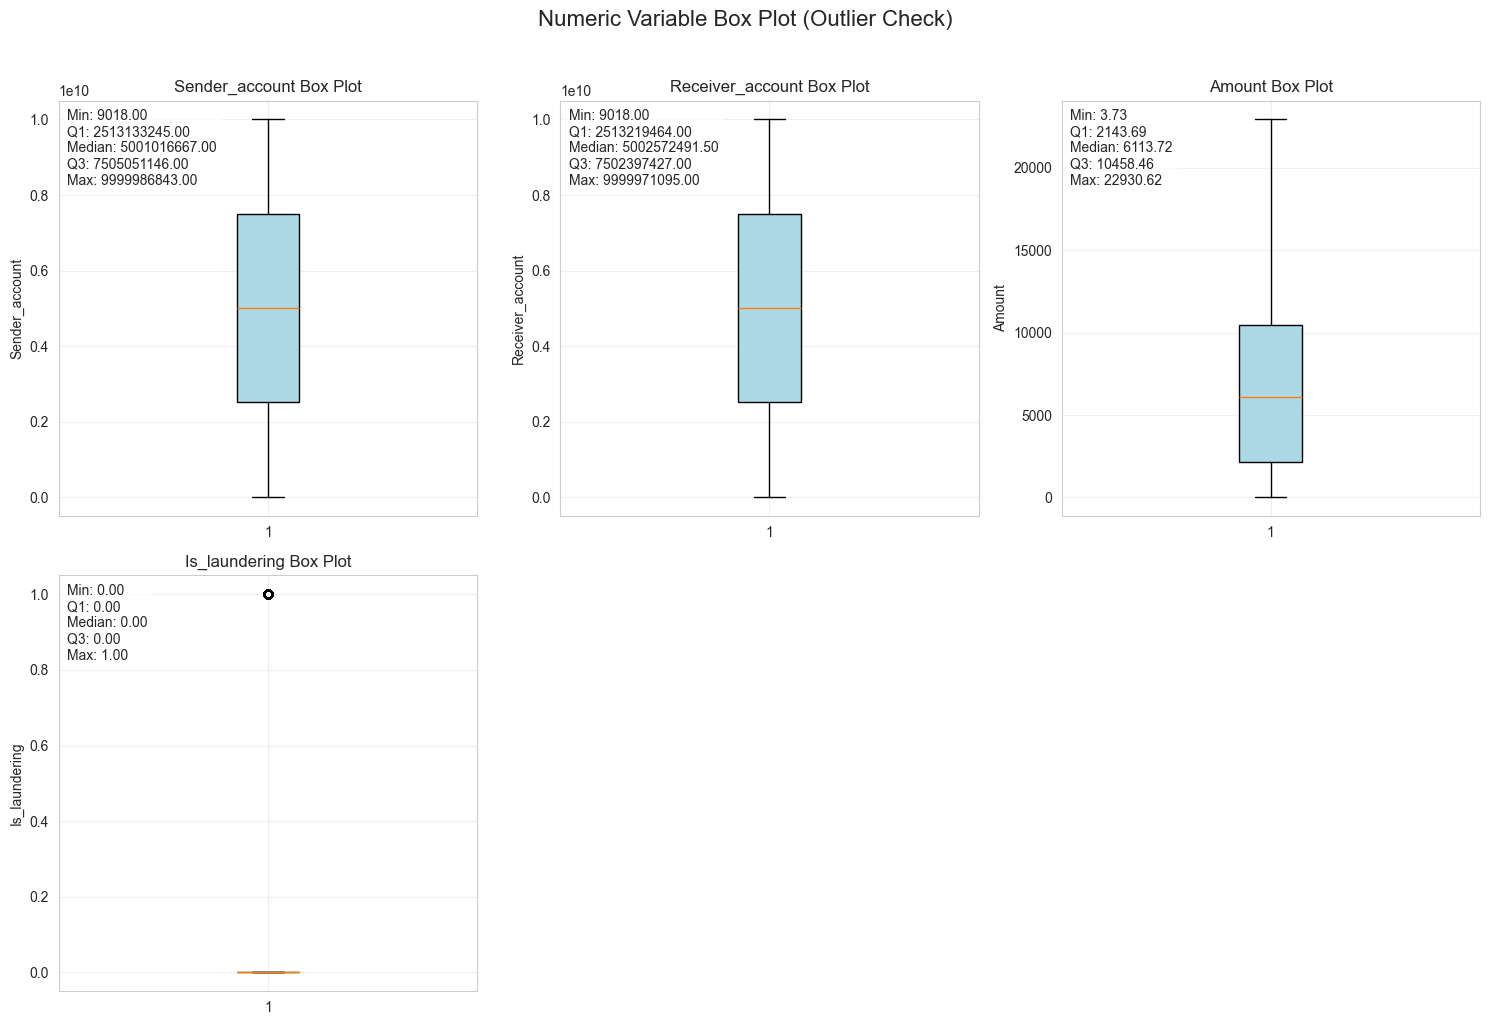

In [ ]:
# Box plot to check numeric variable distribution and outliers
if len(numeric_columns) > 0:
    n_cols = min(3, len(numeric_columns))
    n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    fig.suptitle('Numeric Variable Box Plot (Outlier Check)', fontsize=16, y=1.02)

    # Ensure axes is a 2D array
    if n_rows == 1:
        axes = axes.reshape(1, -1) if len(numeric_columns) > 1 else [axes]
    if n_cols == 1:
        axes = axes.reshape(-1, 1)

    for i, col in enumerate(numeric_columns):
        if len(numeric_columns) == 1:
            ax = axes
        elif n_rows == 1:
            ax = axes[i]
        else:
            row = i // n_cols
            col_idx = i % n_cols
            ax = axes[row, col_idx]

        try:
            # Check data variability
            if df_cleaned[col].nunique() > 1:
                # Plot box plot
                box_plot = ax.boxplot(df_cleaned[col], patch_artist=True)
                box_plot['boxes'][0].set_facecolor('lightblue')
                ax.set_title(f'{col} Box Plot')
                ax.set_ylabel(col)
                ax.grid(True, alpha=0.3)

                # Add statistical information
                q1 = df_cleaned[col].quantile(0.25)
                q3 = df_cleaned[col].quantile(0.75)
                median = df_cleaned[col].median()
                min_val = df_cleaned[col].min()
                max_val = df_cleaned[col].max()

                stats_text = f'Min: {min_val:.2f}\nQ1: {q1:.2f}\nMedian: {median:.2f}\nQ3: {q3:.2f}\nMax: {max_val:.2f}'
                ax.text(0.02, 0.98, stats_text,
                        transform=ax.transAxes, verticalalignment='top',
                        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
            else:
                # If all values are the same, show a horizontal line
                constant_value = df_cleaned[col].iloc[0]
                ax.axhline(y=constant_value, color='blue', linewidth=3)
                ax.set_title(f'{col} (Constant: {constant_value:.2f})')
                ax.set_ylabel(col)
                ax.text(0.5, 0.5, f'All values identical\nValue: {constant_value:.2f}',
                        transform=ax.transAxes, ha='center', va='center',
                        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))
        except Exception as e:
            ax.text(0.5, 0.5, f'Cannot plot box plot\n{str(e)}',
                    transform=ax.transAxes, ha='center', va='center',
                    bbox=dict(boxstyle='round', facecolor='red', alpha=0.3))
            ax.set_title(f'{col} (Plot Failed)')

    # Hide extra subplots
    if len(numeric_columns) > 1:
        for i in range(len(numeric_columns), n_rows * n_cols):
            row = i // n_cols
            col_idx = i % n_cols
            axes[row, col_idx].set_visible(False)

    plt.tight_layout()
    plt.show()


🚀 Starting time feature engineering on cleaned data...
🕐 Starting time feature engineering...
  • Converting time format...
  • Extracting date features...
  • Extracting time features...
  • Creating business time features...
✅ Time feature engineering completed!

📊 Feature engineering results:
Original dataset shape: (9504852, 12)
After adding time features: (9504852, 24)
New features: ['year', 'month', 'day', 'dayofweek', 'quarter', 'hour', 'minute', 'is_weekend', 'is_business_hour', 'weekday_name', 'month_name', 'time_period']
Number of new features: 12

🔍 Time features preview:
        Date      Time  year  month  day  dayofweek  quarter  hour  minute  \
0 2022-10-07  10:35:19  2022     10    7          4        4    10      35   
1 2022-10-07  10:35:20  2022     10    7          4        4    10      35   
2 2022-10-07  10:35:20  2022     10    7          4        4    10      35   
3 2022-10-07  10:35:21  2022     10    7          4        4    10      35   
4 2022-10-07  10:35:

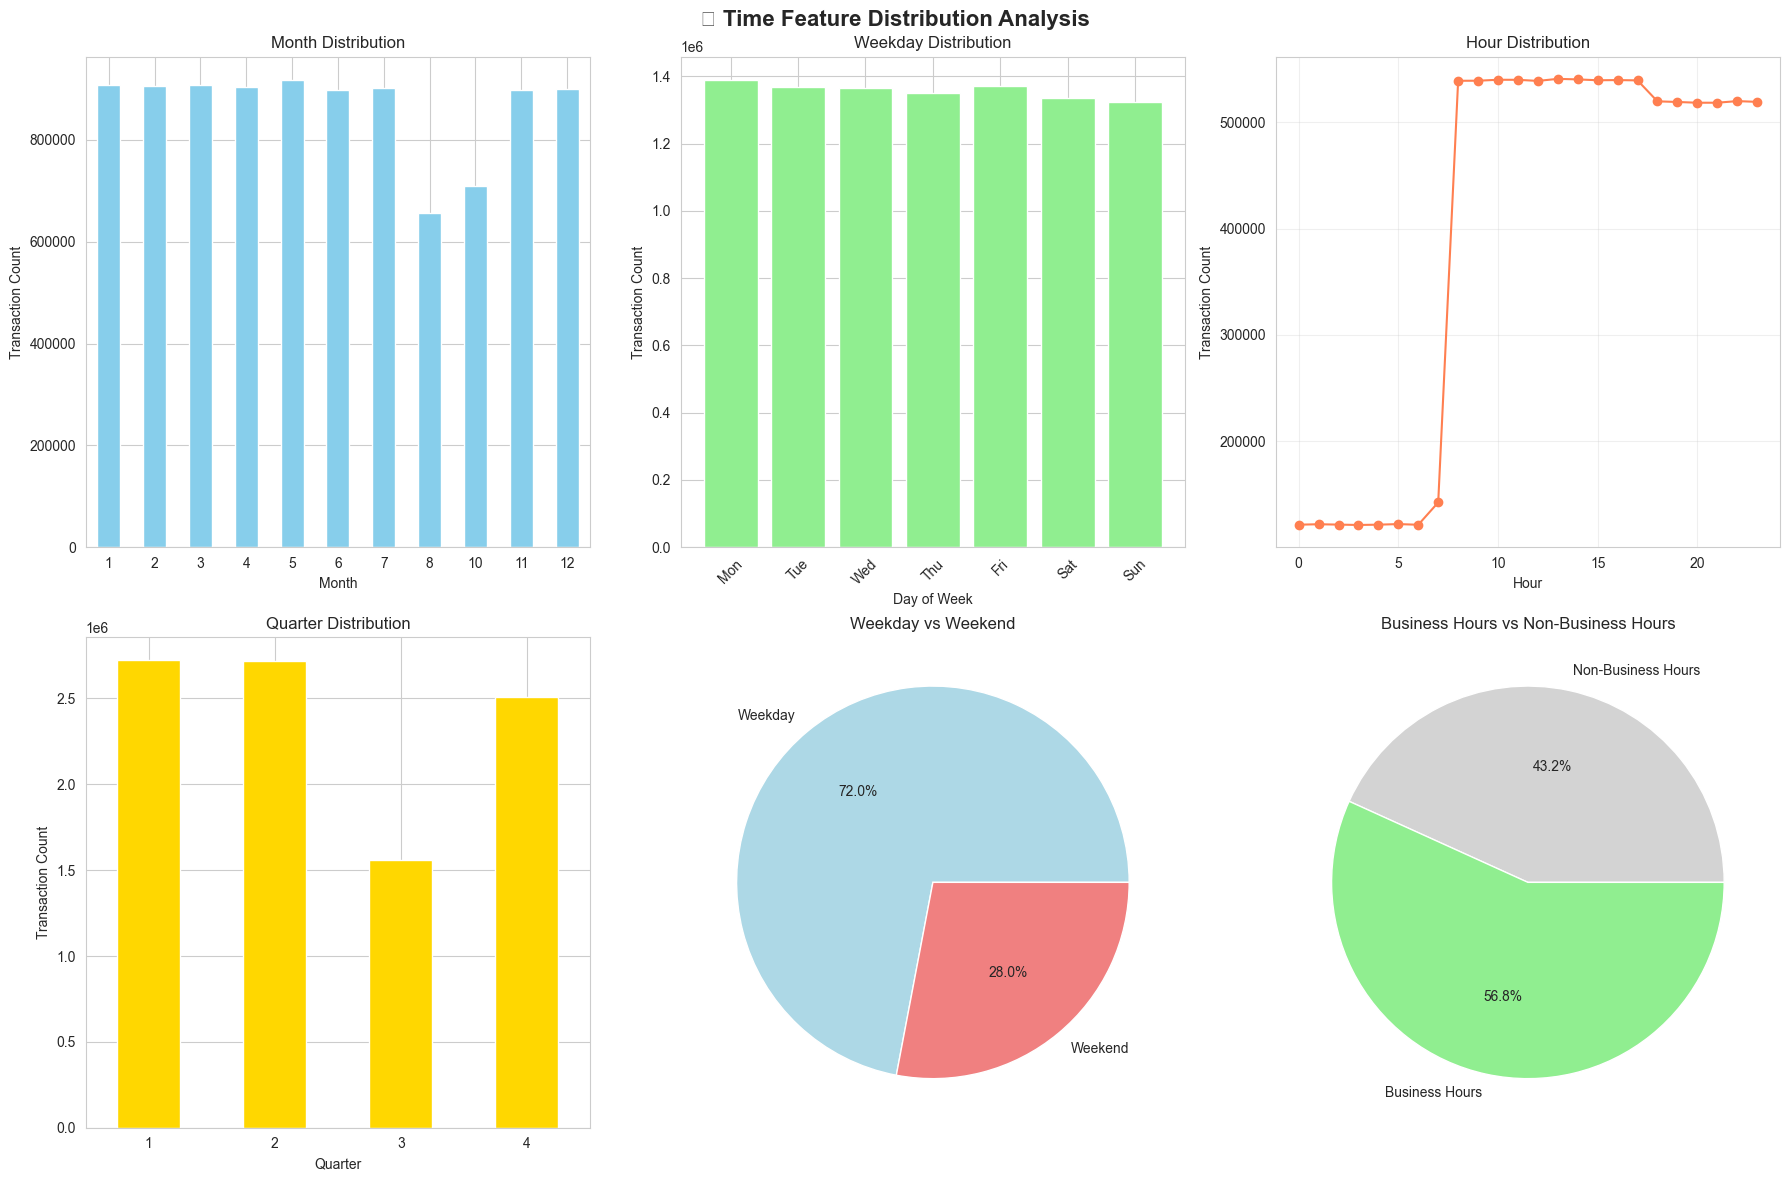


📊 English categorical features distribution:
Weekday name distribution:
weekday_name
Monday       1389246
Friday       1369872
Tuesday      1369343
Wednesday    1366034
Thursday     1350706
Saturday     1336623
Sunday       1323028
Name: count, dtype: int64

Month name distribution:
month_name
May         917601
March       908562
January     908320
February    904806
April       902883
July        902239
December    900341
November    897621
June        897243
October     708654
August      656582
Name: count, dtype: int64

Time period distribution:
time_period
Afternoon    3238424
Morning      2421860
Evening      2075425
Night        1769143
Name: count, dtype: int64

💡 Time feature engineering analysis summary:
  • Successfully extracted year, month, day, weekday, quarter, hour, minute time features
  • Created is_weekend and is_business_hour business-related time features
  • Added English categorical features: weekday_name, month_name, time_period
  • All features use English na

In [ ]:
# 🕐 时间特征工程 (Time Feature Engineering)
def extract_time_features(df):
    """Extract time-related features with English naming"""
    print("🕐 Starting time feature engineering...")
    df_copy = df.copy()

    # Convert time format
    print("  • Converting time format...")
    df_copy['Date'] = pd.to_datetime(df_copy['Date'])
    df_copy['Time'] = pd.to_datetime(df_copy['Time'], format='%H:%M:%S').dt.time

    # Extract date features - All in English
    print("  • Extracting date features...")
    df_copy['year'] = df_copy['Date'].dt.year
    df_copy['month'] = df_copy['Date'].dt.month
    df_copy['day'] = df_copy['Date'].dt.day
    df_copy['dayofweek'] = df_copy['Date'].dt.dayofweek  # 0=Monday, 6=Sunday
    df_copy['quarter'] = df_copy['Date'].dt.quarter

    # Extract time features
    print("  • Extracting time features...")
    df_copy['hour'] = pd.to_datetime(df_copy['Time'], format='%H:%M:%S').dt.hour
    df_copy['minute'] = pd.to_datetime(df_copy['Time'], format='%H:%M:%S').dt.minute

    # Business time features - Binary flags in English
    print("  • Creating business time features...")
    df_copy['is_weekend'] = df_copy['dayofweek'].isin([5, 6]).astype(int)  # 0=Weekday, 1=Weekend
    df_copy['is_business_hour'] = ((df_copy['hour'] >= 8) & (df_copy['hour'] <= 17)).astype(int)  # 0=Non-business, 1=Business

    # Add English weekday names - Optional categorical feature
    weekday_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
                      4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
    df_copy['weekday_name'] = df_copy['dayofweek'].map(weekday_mapping)

    # Add English month names - Optional categorical feature
    month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April',
                    5: 'May', 6: 'June', 7: 'July', 8: 'August',
                    9: 'September', 10: 'October', 11: 'November', 12: 'December'}
    df_copy['month_name'] = df_copy['month'].map(month_mapping)

    # Add time period categories
    def categorize_hour(hour):
        if 6 <= hour < 12:
            return 'Morning'
        elif 12 <= hour < 18:
            return 'Afternoon'
        elif 18 <= hour < 22:
            return 'Evening'
        else:
            return 'Night'

    df_copy['time_period'] = df_copy['hour'].apply(categorize_hour)

    print("✅ Time feature engineering completed!")
    return df_copy

# Apply time feature engineering
print("🚀 Starting time feature engineering on cleaned data...")
df_with_time_features = extract_time_features(df_cleaned)

print(f"\n📊 Feature engineering results:")
print(f"Original dataset shape: {df_cleaned.shape}")
print(f"After adding time features: {df_with_time_features.shape}")

# Display new features
new_features = [col for col in df_with_time_features.columns if col not in df_cleaned.columns]
print(f"New features: {new_features}")
print(f"Number of new features: {len(new_features)}")

# Display time features basic information
print(f"\n🔍 Time features preview:")
time_features_sample = df_with_time_features[['Date', 'Time', 'year', 'month', 'day', 'dayofweek', 'quarter', 'hour', 'minute', 'is_weekend', 'is_business_hour', 'weekday_name', 'month_name', 'time_period']].head()
print(time_features_sample)

# Check time feature distributions
print(f"\n📈 Time feature distributions:")
print(f"Year range: {df_with_time_features['year'].min()} - {df_with_time_features['year'].max()}")
print(f"Month distribution: {df_with_time_features['month'].value_counts().sort_index().to_dict()}")
print(f"Weekday distribution: {df_with_time_features['dayofweek'].value_counts().sort_index().to_dict()}")
print(f"Weekend transaction ratio: {df_with_time_features['is_weekend'].mean():.4f}")
print(f"Business hour transaction ratio: {df_with_time_features['is_business_hour'].mean():.4f}")

# Visualize time feature distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('🕐 Time Feature Distribution Analysis', fontsize=16, fontweight='bold')

# Month distribution
df_with_time_features['month'].value_counts().sort_index().plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Month Distribution')
axes[0,0].set_xlabel('Month')
axes[0,0].set_ylabel('Transaction Count')
axes[0,0].tick_params(axis='x', rotation=0)

# Weekday distribution
weekday_names_en = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_counts = df_with_time_features['dayofweek'].value_counts().sort_index()
axes[0,1].bar(range(7), weekday_counts.values, color='lightgreen')
axes[0,1].set_title('Weekday Distribution')
axes[0,1].set_xlabel('Day of Week')
axes[0,1].set_ylabel('Transaction Count')
axes[0,1].set_xticks(range(7))
axes[0,1].set_xticklabels(weekday_names_en, rotation=45)

# Hour distribution
df_with_time_features['hour'].value_counts().sort_index().plot(kind='line', ax=axes[0,2], color='coral', marker='o')
axes[0,2].set_title('Hour Distribution')
axes[0,2].set_xlabel('Hour')
axes[0,2].set_ylabel('Transaction Count')
axes[0,2].grid(True, alpha=0.3)

# Quarter distribution
df_with_time_features['quarter'].value_counts().sort_index().plot(kind='bar', ax=axes[1,0], color='gold')
axes[1,0].set_title('Quarter Distribution')
axes[1,0].set_xlabel('Quarter')
axes[1,0].set_ylabel('Transaction Count')
axes[1,0].tick_params(axis='x', rotation=0)

# Weekday vs Weekend
business_day_data_en = ['Weekday', 'Weekend']
business_day_counts = [
    df_with_time_features[df_with_time_features['is_weekend']==0].shape[0],
    df_with_time_features[df_with_time_features['is_weekend']==1].shape[0]
]
axes[1,1].pie(business_day_counts, labels=business_day_data_en, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
axes[1,1].set_title('Weekday vs Weekend')

# Business hours vs Non-business hours
work_hour_data_en = ['Non-Business Hours', 'Business Hours']
work_hour_counts = [
    df_with_time_features[df_with_time_features['is_business_hour']==0].shape[0],
    df_with_time_features[df_with_time_features['is_business_hour']==1].shape[0]
]
axes[1,2].pie(work_hour_counts, labels=work_hour_data_en, autopct='%1.1f%%', colors=['lightgray', 'lightgreen'])
axes[1,2].set_title('Business Hours vs Non-Business Hours')

plt.tight_layout()
plt.show()

#
print(f"\n📊 English categorical features distribution:")
print(f"Weekday name distribution:")
print(df_with_time_features['weekday_name'].value_counts())
print(f"\nMonth name distribution:")
print(df_with_time_features['month_name'].value_counts())
print(f"\nTime period distribution:")
print(df_with_time_features['time_period'].value_counts())

print("\n💡 Time feature engineering analysis summary:")
print("  • Successfully extracted year, month, day, weekday, quarter, hour, minute time features")
print("  • Created is_weekend and is_business_hour business-related time features")
print("  • Added English categorical features: weekday_name, month_name, time_period")
print("  • All features use English naming and values for CSV export")
print("  • These features help models identify time patterns and periodic behaviors")
print("  • Time patterns are often important features for money laundering detection")


In [ ]:
# Data cleaning summary report (including time feature engineering)
print("=" * 80)
print("                Data Cleaning and Feature Engineering Summary Report")
print("=" * 80)

print(f"📊 Data processing workflow:")
print(f"   Original dataset shape: {df.shape}")
print(f"   Cleaned dataset shape: {df_cleaned.shape}")

print(f"\n📈 Feature statistics:")
original_features = len(df_cleaned.columns)
time_features = len(new_features) if 'new_features' in locals() else 0
total_features = len(df_with_time_features.columns)

print(f"   - Original features: {original_features}")
print(f"   - New time features: {time_features}")
print(f"   - Total features: {total_features}")

# Reclassify feature types (including time features)
current_numeric = df_with_time_features.select_dtypes(include=[np.number]).columns.tolist()
current_categorical = df_with_time_features.select_dtypes(include=['object']).columns.tolist()

print(f"\n📋 Final feature classification:")
print(f"   - Numeric variables: {len(current_numeric)} variables")
print(f"   - Categorical variables: {len(current_categorical)} variables")

print(f"\n✅ Data quality check results:")
print(f"   - Missing values: {df_with_time_features.isnull().sum().sum()}")
print(f"   - Duplicate values: {df_with_time_features.duplicated().sum()}")

print(f"\n🕐 Time feature engineering achievements:")
if 'new_features' in locals():
    print(f"   - Extracted time features: {new_features}")
print(f"   - Business features: ['is_weekend', 'is_business_hour']")
print(f"   - Time dimensions: ['year', 'month', 'day', 'dayofweek', 'quarter', 'hour', 'minute']")

print(f"\n📋 Complete feature list:")
print(f"   - Numeric variables: {current_numeric}")
print(f"   - Categorical variables: {current_categorical}")

print("=" * 80)
print("🎯 Complete dataset ready for machine learning has been saved to SAML-D_cleaned.csv")


                Data Cleaning and Feature Engineering Summary Report
📊 Data processing workflow:
   Original dataset shape: (9504852, 12)
   Cleaned dataset shape: (9504852, 12)

📈 Feature statistics:
   - Original features: 12
   - New time features: 12
   - Total features: 24

📋 Final feature classification:
   - Numeric variables: 13 variables
   - Categorical variables: 10 variables

✅ Data quality check results:
   - Missing values: 0
   - Duplicate values: 5

🕐 Time feature engineering achievements:
   - Extracted time features: ['year', 'month', 'day', 'dayofweek', 'quarter', 'hour', 'minute', 'is_weekend', 'is_business_hour', 'weekday_name', 'month_name', 'time_period']
   - Business features: ['is_weekend', 'is_business_hour']
   - Time dimensions: ['year', 'month', 'day', 'dayofweek', 'quarter', 'hour', 'minute']

📋 Complete feature list:
   - Numeric variables: ['Sender_account', 'Receiver_account', 'Amount', 'Is_laundering', 'year', 'month', 'day', 'dayofweek', 'quarter', '

In [ ]:
# Save cleaned data with time features
output_filename = 'SAML-D_cleaned.csv'
print(f"💾 Saving data to: {output_filename}")
print(f"   Data shape: {df_with_time_features.shape}")
print(f"   Complete dataset including time features")

# Save data (Note: This may take some time due to large dataset)
df_with_time_features.to_csv(output_filename, index=False, encoding='utf-8')
print(f"✅ Cleaned data (with time features) saved to: {output_filename}")

# Generate data dictionary with time features
data_dict = {
    'Column_Name': df_with_time_features.columns,
    'Data_Type': df_with_time_features.dtypes.values,
    'Non_Null_Count': df_with_time_features.count().values,
    'Unique_Count': df_with_time_features.nunique().values,
    'Missing_Count': df_with_time_features.isnull().sum().values
}

data_dictionary = pd.DataFrame(data_dict)

# Add English column descriptions
description_dict = {
    'Time': 'Transaction time (HH:MM:SS)',
    'Date': 'Transaction date (YYYY-MM-DD)',
    'Sender_account': 'Sender account ID',
    'Receiver_account': 'Receiver account ID',
    'Amount': 'Transaction amount',
    'Payment_currency': 'Payment currency',
    'Received_currency': 'Received currency',
    'Sender_bank_location': 'Sender bank location',
    'Receiver_bank_location': 'Receiver bank location',
    'Payment_type': 'Payment type',
    'Is_laundering': 'Money laundering flag (0=Normal, 1=Laundering)',
    'Laundering_type': 'Money laundering type',
    'year': 'Year (extracted from Date)',
    'month': 'Month (extracted from Date, 1-12)',
    'day': 'Day (extracted from Date, 1-31)',
    'dayofweek': 'Day of week (extracted from Date, 0=Monday, 6=Sunday)',
    'quarter': 'Quarter (extracted from Date, 1-4)',
    'hour': 'Hour (extracted from Time, 0-23)',
    'minute': 'Minute (extracted from Time, 0-59)',
    'is_weekend': 'Weekend flag (0=Weekday, 1=Weekend)',
    'is_business_hour': 'Business hour flag (0=Non-business, 1=Business hours 8-17)',
    'weekday_name': 'English weekday name (Monday-Sunday)',
    'month_name': 'English month name (January-December)',
    'time_period': 'Time period category (Morning/Afternoon/Evening/Night)'
}

# Add description column
data_dictionary['Description'] = data_dictionary['Column_Name'].map(description_dict)

print("\n📖 Data Dictionary:")
print(data_dictionary)

# Save data dictionary
data_dictionary.to_csv('SAML-D_data_dictionary.csv', index=False, encoding='utf-8')
print(f"\n💾 Data dictionary saved to: SAML-D_data_dictionary.csv")

# Display final dataset information
print(f"\n📊 Final Dataset Summary:")
print(f"   • Total rows: {df_with_time_features.shape[0]:,}")
print(f"   • Total columns: {df_with_time_features.shape[1]}")
print(f"   • Original features: {df_cleaned.shape[1]}")
print(f"   • Time features added: {len(new_features)}")
print(f"   • File size: approximately {df_with_time_features.memory_usage().sum() / 1024**2:.1f} MB")

# Confirm all data is in English format
print(f"\n🔍 English Data Validation:")
print(f"   • All column names are in English")
print(f"   • All categorical values use English labels")
print(f"   • Numerical features retain original format")
print(f"   • Time features use standardized English naming")

# Show examples of English categorical values
print(f"\n📋 Sample English Categorical Values:")
print(f"   • weekday_name: {list(df_with_time_features['weekday_name'].unique())}")
print(f"   • month_name: {list(df_with_time_features['month_name'].unique()[:6])}... (showing first 6)")
print(f"   • time_period: {list(df_with_time_features['time_period'].unique())}")

print("\n🎉 Data cleaning, time feature engineering, and data saving completed!")
print("✅ SAML-D_cleaned.csv now contains complete time feature engineering results in English format")
print("✅ All data is ready for machine learning with English naming conventions")


💾 Saving data to: SAML-D_cleaned.csv
   Data shape: (9504852, 24)
   Complete dataset including time features
✅ Cleaned data (with time features) saved to: SAML-D_cleaned.csv

📖 Data Dictionary:
               Column_Name       Data_Type  Non_Null_Count  Unique_Count  \
0                     Time          object         9504852         86400   
1                     Date  datetime64[ns]         9504852           321   
2           Sender_account           int64         9504852        292715   
3         Receiver_account           int64         9504852        652266   
4                   Amount         float64         9504852       1921754   
5         Payment_currency          object         9504852            13   
6        Received_currency          object         9504852            13   
7     Sender_bank_location          object         9504852            18   
8   Receiver_bank_location          object         9504852            18   
9             Payment_type          object   

In [ ]:
# 6.1 Numeric Variable Distribution Analysis and Transformation Recommendations
print("=" * 80)
print("                    Numeric Variable Distribution Analysis")
print("=" * 80)

# Numeric variable list, excluding Is_laundering since it's a money laundering indicator
numeric_columns = ['Sender_account', 'Receiver_account', 'Amount']

# Use data sampling to improve performance
sample_size = 100000  # Sample 100k rows from 9.5M rows
print(f"To improve analysis performance, sampling {sample_size:,} rows for analysis")
df_sample = df_cleaned.sample(n=sample_size, random_state=42)

# Distribution analysis function
def analyze_distribution(data, column_name):
    """Analyze variable distribution and provide transformation recommendations"""
    print(f"\n{'='*50}")
    print(f"📊 Variable: {column_name}")
    print(f"{'='*50}")

    # Basic statistical information
    desc_stats = data.describe()
    print(f"Basic Statistics:")
    print(f"  - Mean: {desc_stats['mean']:,.2f}")
    print(f"  - Median: {desc_stats['50%']:,.2f}")
    print(f"  - Std Dev: {desc_stats['std']:,.2f}")
    print(f"  - Min: {desc_stats['min']:,.2f}")
    print(f"  - Max: {desc_stats['max']:,.2f}")
    print(f"  - IQR: {desc_stats['75%'] - desc_stats['25%']:,.2f}")

    # Distribution characteristics analysis
    skewness = stats.skew(data.dropna())
    kurtosis_val = stats.kurtosis(data.dropna())

    print(f"\nDistribution Characteristics:")
    print(f"  - Skewness: {skewness:.3f}")
    print(f"  - Kurtosis: {kurtosis_val:.3f}")

    # Skewness interpretation
    if abs(skewness) < 0.5:
        skew_desc = "Approximately normal distribution"
    elif skewness > 0.5:
        skew_desc = "Right-skewed (positive skew) - long tail on right"
    else:
        skew_desc = "Left-skewed (negative skew) - long tail on left"

    # Kurtosis interpretation
    if abs(kurtosis_val) < 0.5:
        kurt_desc = "Normal distribution kurtosis"
    elif kurtosis_val > 0.5:
        kurt_desc = "Leptokurtic (more peaked than normal)"
    else:
        kurt_desc = "Platykurtic (flatter than normal)"

    print(f"  - Skewness interpretation: {skew_desc}")
    print(f"  - Kurtosis interpretation: {kurt_desc}")

    # Normality test (using subsample)
    test_sample = data.dropna().sample(n=min(5000, len(data.dropna())), random_state=42)
    try:
        stat, p_value = stats.shapiro(test_sample)
        print(f"\nNormality Test (Shapiro-Wilk, n={len(test_sample)}):")
        print(f"  - Statistic: {stat:.6f}")
        print(f"  - p-value: {p_value:.6f}")
        if p_value < 0.05:
            print(f"  - Conclusion: Reject normality hypothesis (p < 0.05)")
        else:
            print(f"  - Conclusion: Cannot reject normality hypothesis (p >= 0.05)")
    except Exception as e:
        print(f"\nNormality test failed: {str(e)}")

    # Transformation recommendations
    print(f"\n📋 Transformation Recommendations:")

    # Check for zero or negative values
    has_zero_negative = (data <= 0).any()

    if abs(skewness) < 0.5:
        print("  ✅ Distribution is approximately normal, no transformation needed")
    elif skewness > 1:
        print("  🔄 Strongly right-skewed, recommended transformations:")
        if not has_zero_negative:
            print("     • Log transformation (log)")
            print("     • Square root transformation (sqrt)")
            print("     • Box-Cox transformation")
        else:
            print("     • Yeo-Johnson transformation (suitable for zero/negative values)")
            print("     • Add constant then log transformation")
    elif skewness < -1:
        print("  🔄 Strongly left-skewed, recommended transformations:")
        print("     • Square transformation")
        print("     • Exponential transformation")
        print("     • Reflection then log transformation")
    elif 0.5 <= abs(skewness) <= 1:
        print("  🔄 Mildly skewed, consider transformations:")
        if skewness > 0:
            print("     • Square root transformation")
            if not has_zero_negative:
                print("     • Log transformation")
        else:
            print("     • Square transformation")

    return {
        'mean': desc_stats['mean'],
        'median': desc_stats['50%'],
        'std': desc_stats['std'],
        'skewness': skewness,
        'kurtosis': kurtosis_val,
        'transform_needed': abs(skewness) > 0.5
    }

# Analyze all numeric variables
distribution_analysis = {}
for col in numeric_columns:
    if col in df_sample.columns:
        distribution_analysis[col] = analyze_distribution(df_sample[col], col)


                    Numeric Variable Distribution Analysis
To improve analysis performance, sampling 100,000 rows for analysis

📊 Variable: Sender_account
Basic Statistics:
  - Mean: 4,992,191,898.01
  - Median: 4,988,131,539.00
  - Std Dev: 2,892,275,298.46
  - Min: 92,172.00
  - Max: 9,999,667,003.00
  - IQR: 5,006,070,205.00

Distribution Characteristics:
  - Skewness: 0.006
  - Kurtosis: -1.198
  - Skewness interpretation: Approximately normal distribution
  - Kurtosis interpretation: Platykurtic (flatter than normal)

Normality Test (Shapiro-Wilk, n=5000):
  - Statistic: 0.955560
  - p-value: 0.000000
  - Conclusion: Reject normality hypothesis (p < 0.05)

📋 Transformation Recommendations:
  ✅ Distribution is approximately normal, no transformation needed

📊 Variable: Receiver_account
Basic Statistics:
  - Mean: 4,999,684,385.64
  - Median: 4,983,521,677.50
  - Std Dev: 2,887,858,771.26
  - Min: 13,266.00
  - Max: 9,999,373,356.00
  - IQR: 4,995,047,747.00

Distribution Characteri

\n============================================================
             Numeric Variable Distribution Visualization
To improve plotting performance, sampling 10,000 rows for visualization


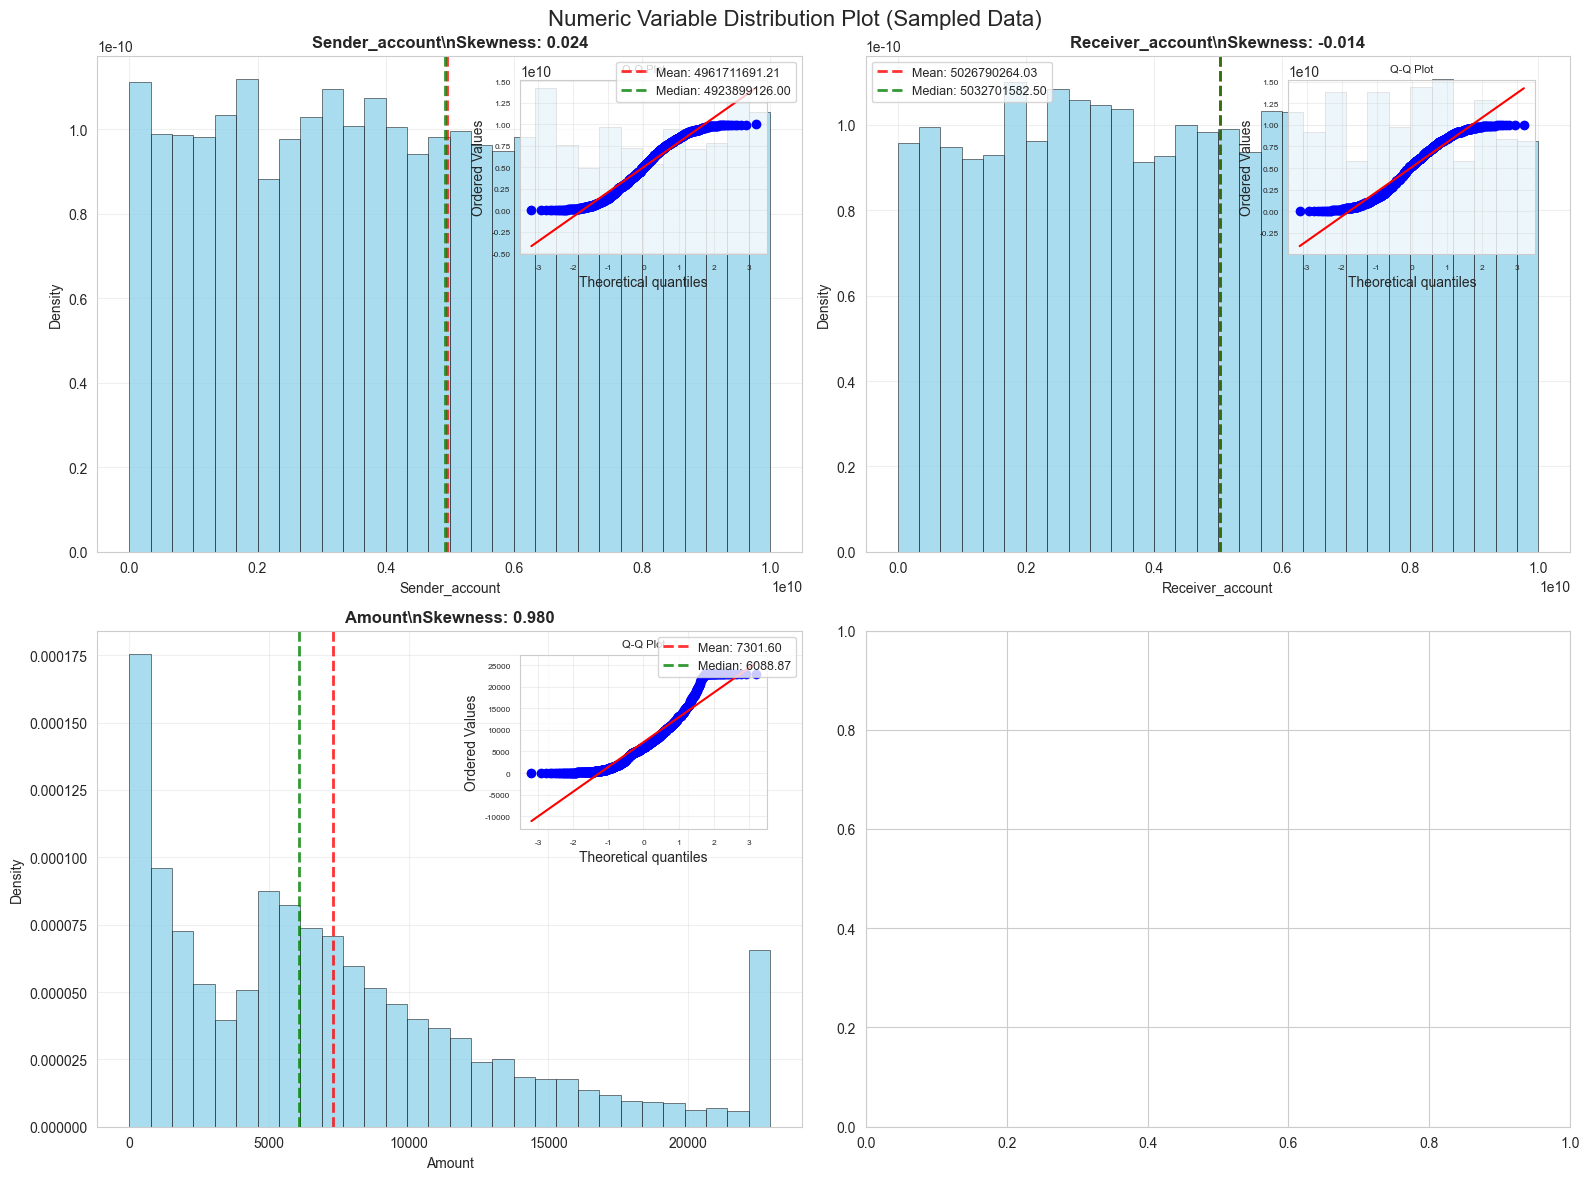

In [ ]:
# Optimized numeric variable distribution visualization
def plot_numeric_distributions_optimized(df_data, columns, sample_size=10000):
    """Optimized numeric variable distribution visualization"""

    # Data sampling
    if len(df_data) > sample_size:
        df_plot = df_data.sample(n=sample_size, random_state=42)
        print(f"To improve plotting performance, sampling {sample_size:,} rows for visualization")
    else:
        df_plot = df_data.copy()

    n_vars = len(columns)
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Numeric Variable Distribution Plot (Sampled Data)', fontsize=16, y=0.98)

    axes = axes.flatten()

    for i, col in enumerate(columns):
        if i < len(axes):
            ax = axes[i]

            # Create subplot layout
            gs = ax.get_gridspec()
            ax.remove()

            # Left side: histogram
            ax_hist = fig.add_subplot(gs[i//2, i%2])

            # Plot histogram
            data = df_plot[col].dropna()
            ax_hist.hist(data, bins=30, alpha=0.7, color='skyblue', density=True, edgecolor='black', linewidth=0.5)

            # Statistical information
            mean_val = data.mean()
            median_val = data.median()
            std_val = data.std()
            skew_val = stats.skew(data)

            # Add statistical lines
            ax_hist.axvline(mean_val, color='red', linestyle='--', alpha=0.8, linewidth=2, label=f'Mean: {mean_val:.2f}')
            ax_hist.axvline(median_val, color='green', linestyle='--', alpha=0.8, linewidth=2, label=f'Median: {median_val:.2f}')

            # Title and labels
            ax_hist.set_title(f'{col}\\nSkewness: {skew_val:.3f}', fontsize=12, fontweight='bold')
            ax_hist.set_xlabel(col, fontsize=10)
            ax_hist.set_ylabel('Density', fontsize=10)
            ax_hist.legend(fontsize=9)
            ax_hist.grid(True, alpha=0.3)

            # Add Q-Q plot (small inset)
            try:
                # Create inset Q-Q plot
                from matplotlib.patches import Rectangle
                ax_qq = ax_hist.inset_axes([0.6, 0.6, 0.35, 0.35])

                # Plot Q-Q plot
                stats.probplot(data.sample(n=min(1000, len(data)), random_state=42), dist="norm", plot=ax_qq)
                ax_qq.set_title('Q-Q Plot', fontsize=8)
                ax_qq.tick_params(labelsize=6)
                ax_qq.grid(True, alpha=0.3)

                # Add background
                ax_qq.patch.set_facecolor('white')
                ax_qq.patch.set_alpha(0.8)

            except Exception as e:
                print(f"Q-Q plot failed for {col}: {str(e)}")

    plt.tight_layout()
    plt.show()

# Execute visualization
print("\\n" + "="*60)
print("             Numeric Variable Distribution Visualization")
print("="*60)

plot_numeric_distributions_optimized(df_sample, numeric_columns)


\n======================================================================
                  Numeric Variable Transformation Examples
Variables needing transformation: ['Amount']


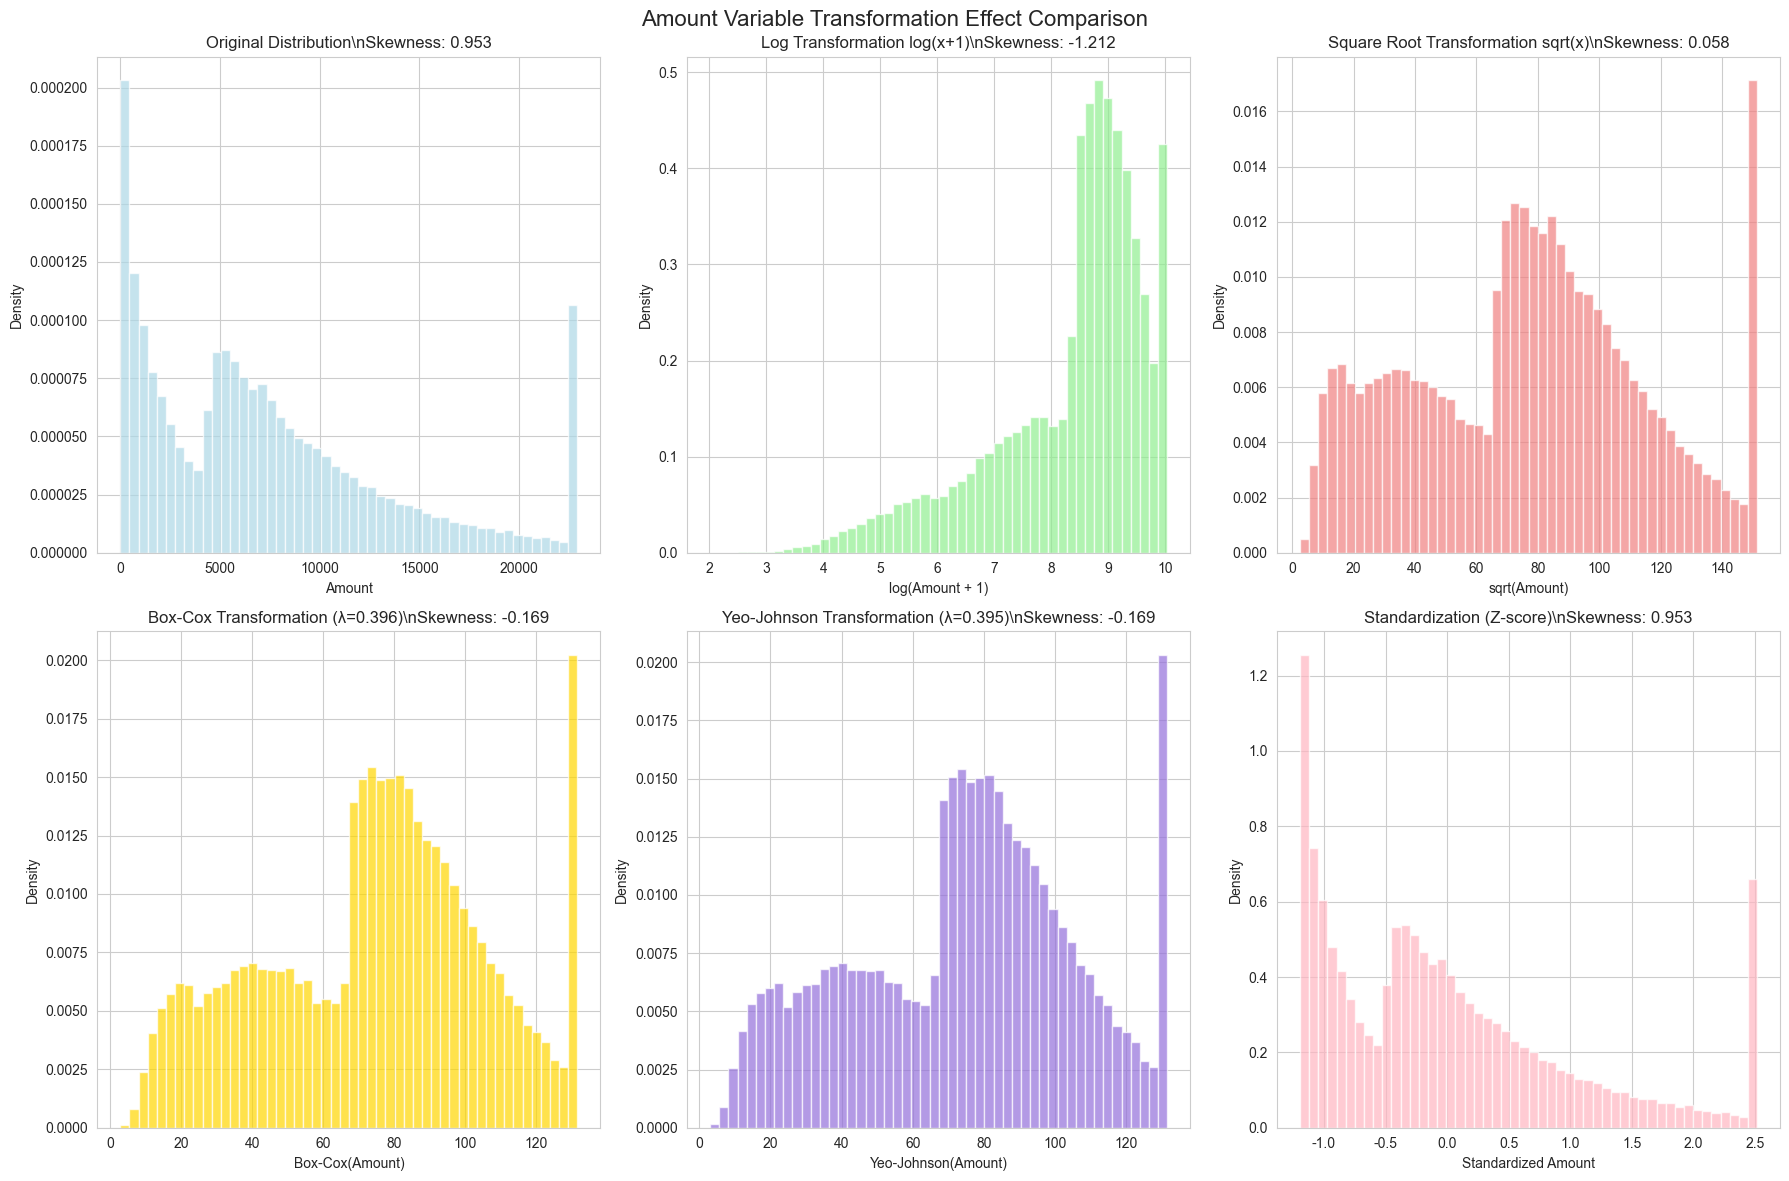

\n📊 Transformation Effect Summary (Amount Variable):
  - Original distribution skewness: 0.953
  - Log transformation skewness: -1.212
  - Square root transformation skewness: 0.058
  - Box-Cox transformation skewness: -0.169
  - Yeo-Johnson transformation skewness: -0.169
  - Standardization skewness: 0.953
\n💡 Recommendation: Choose the transformation method with skewness closest to 0 for data preprocessing


In [ ]:
# Numeric variable transformation examples (for skewed distributions)
print("\\n" + "="*70)
print("                  Numeric Variable Transformation Examples")
print("="*70)

# Select variables that need transformation (based on skewness analysis)
transform_needed = [col for col, analysis in distribution_analysis.items()
                   if analysis['transform_needed']]

if transform_needed:
    print(f"Variables needing transformation: {transform_needed}")

    # Use Amount as example for transformation demonstration
    if 'Amount' in transform_needed:
        amount_data = df_sample['Amount'].dropna()

        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('Amount Variable Transformation Effect Comparison', fontsize=16, y=0.98)

        # Original distribution
        axes[0,0].hist(amount_data, bins=50, alpha=0.7, color='lightblue', density=True)
        axes[0,0].set_title(f'Original Distribution\\nSkewness: {stats.skew(amount_data):.3f}')
        axes[0,0].set_xlabel('Amount')
        axes[0,0].set_ylabel('Density')

        # Log transformation
        amount_log = np.log1p(amount_data)  # log1p avoids log(0) issue
        axes[0,1].hist(amount_log, bins=50, alpha=0.7, color='lightgreen', density=True)
        axes[0,1].set_title(f'Log Transformation log(x+1)\\nSkewness: {stats.skew(amount_log):.3f}')
        axes[0,1].set_xlabel('log(Amount + 1)')
        axes[0,1].set_ylabel('Density')

        # Square root transformation
        amount_sqrt = np.sqrt(amount_data)
        axes[0,2].hist(amount_sqrt, bins=50, alpha=0.7, color='lightcoral', density=True)
        axes[0,2].set_title(f'Square Root Transformation sqrt(x)\\nSkewness: {stats.skew(amount_sqrt):.3f}')
        axes[0,2].set_xlabel('sqrt(Amount)')
        axes[0,2].set_ylabel('Density')

        # Box-Cox transformation
        try:
            from scipy.stats import boxcox
            amount_positive = amount_data[amount_data > 0]
            amount_boxcox, lambda_param = boxcox(amount_positive)
            axes[1,0].hist(amount_boxcox, bins=50, alpha=0.7, color='gold', density=True)
            axes[1,0].set_title(f'Box-Cox Transformation (λ={lambda_param:.3f})\\nSkewness: {stats.skew(amount_boxcox):.3f}')
            axes[1,0].set_xlabel('Box-Cox(Amount)')
            axes[1,0].set_ylabel('Density')
        except Exception as e:
            axes[1,0].text(0.5, 0.5, f'Box-Cox transformation failed\\n{str(e)}',
                          ha='center', va='center', transform=axes[1,0].transAxes)
            axes[1,0].set_title('Box-Cox Transformation (Failed)')

        # Yeo-Johnson transformation
        try:
            from scipy.stats import yeojohnson
            amount_yj, lambda_yj = yeojohnson(amount_data)
            axes[1,1].hist(amount_yj, bins=50, alpha=0.7, color='mediumpurple', density=True)
            axes[1,1].set_title(f'Yeo-Johnson Transformation (λ={lambda_yj:.3f})\\nSkewness: {stats.skew(amount_yj):.3f}')
            axes[1,1].set_xlabel('Yeo-Johnson(Amount)')
            axes[1,1].set_ylabel('Density')
        except Exception as e:
            axes[1,1].text(0.5, 0.5, f'Yeo-Johnson transformation failed\\n{str(e)}',
                          ha='center', va='center', transform=axes[1,1].transAxes)
            axes[1,1].set_title('Yeo-Johnson Transformation (Failed)')

        # Standardized distribution
        from sklearn.preprocessing import StandardScaler
        amount_scaled = StandardScaler().fit_transform(amount_data.values.reshape(-1, 1)).flatten()
        axes[1,2].hist(amount_scaled, bins=50, alpha=0.7, color='lightpink', density=True)
        axes[1,2].set_title(f'Standardization (Z-score)\\nSkewness: {stats.skew(amount_scaled):.3f}')
        axes[1,2].set_xlabel('Standardized Amount')
        axes[1,2].set_ylabel('Density')

        plt.tight_layout()
        plt.show()

        # Transformation effect summary
        print("\\n📊 Transformation Effect Summary (Amount Variable):")
        print(f"  - Original distribution skewness: {stats.skew(amount_data):.3f}")
        print(f"  - Log transformation skewness: {stats.skew(amount_log):.3f}")
        print(f"  - Square root transformation skewness: {stats.skew(amount_sqrt):.3f}")
        try:
            print(f"  - Box-Cox transformation skewness: {stats.skew(amount_boxcox):.3f}")
        except:
            pass
        try:
            print(f"  - Yeo-Johnson transformation skewness: {stats.skew(amount_yj):.3f}")
        except:
            pass
        print(f"  - Standardization skewness: {stats.skew(amount_scaled):.3f}")

        print("\\n💡 Recommendation: Choose the transformation method with skewness closest to 0 for data preprocessing")

else:
    print("All numeric variables have relatively normal distributions, no transformation needed")


In [ ]:
# 6.2 Categorical Variable Distribution Analysis and Visualization
print("\\n" + "="*80)
print("                   Categorical Variable Distribution Analysis")
print("="*80)

# Categorical variable list
categorical_columns = ['Time', 'Date', 'Payment_currency', 'Received_currency',
                      'Sender_bank_location', 'Receiver_bank_location', 'Payment_type', 'Laundering_type']

def analyze_categorical_distribution(data, column_name, top_n=10):
    """Analyze categorical variable distribution"""
    print(f"\\n{'='*60}")
    print(f"📊 Categorical Variable: {column_name}")
    print(f"{'='*60}")

    # Basic statistics
    value_counts = data.value_counts()
    total_count = len(data)

    print(f"Basic Information:")
    print(f"  - Total records: {total_count:,}")
    print(f"  - Unique values: {data.nunique():,}")
    print(f"  - Missing values: {data.isnull().sum():,}")
    print(f"  - Missing percentage: {data.isnull().sum()/total_count*100:.2f}%")

    # Frequency distribution
    print(f"\\nTop {top_n} most frequent values:")
    for i, (value, count) in enumerate(value_counts.head(top_n).items(), 1):
        percentage = count / total_count * 100
        print(f"  {i:2d}. {value}: {count:,} ({percentage:.2f}%)")

    # Distribution characteristics analysis
    print(f"\\nDistribution Characteristics:")

    # Calculate Gini coefficient (measure distribution inequality)
    proportions = value_counts / total_count
    gini = 1 - sum(proportions ** 2)
    print(f"  - Gini coefficient: {gini:.3f} (0=perfectly uniform, 1=completely uneven)")

    # Analyze distribution type
    if data.nunique() == 1:
        dist_type = "Constant distribution (all values identical)"
    elif data.nunique() == 2:
        dist_type = "Binary distribution"
    elif data.nunique() < 10:
        dist_type = "Low cardinality distribution"
    elif data.nunique() < 100:
        dist_type = "Medium cardinality distribution"
    else:
        dist_type = "High cardinality distribution"

    print(f"  - Distribution type: {dist_type}")

    # Concentration analysis
    top1_percent = value_counts.iloc[0] / total_count * 100
    top5_percent = value_counts.head(5).sum() / total_count * 100
    top10_percent = value_counts.head(10).sum() / total_count * 100

    print(f"  - Most frequent value percentage: {top1_percent:.2f}%")
    print(f"  - Top 5 values percentage: {top5_percent:.2f}%")
    print(f"  - Top 10 values percentage: {top10_percent:.2f}%")

    # Data quality recommendations
    print(f"\\n📋 Data Quality Analysis:")
    if data.nunique() == 1:
        print("  ⚠️  All values are identical, this variable has no predictive value, recommend removal")
    elif top1_percent > 95:
        print("  ⚠️  Extremely uneven distribution, dominant category exceeds 95%")
    elif top1_percent > 80:
        print("  ⚠️  Severely uneven distribution, may need resampling or special handling")
    elif gini < 0.1:
        print("  ℹ️  Relatively uniform distribution")
    elif gini > 0.8:
        print("  ℹ️  Relatively concentrated distribution")
    else:
        print("  ✅ Reasonable distribution")

    # Encoding recommendations
    print(f"\\n🔧 Encoding Recommendations:")
    if data.nunique() == 2:
        print("  • Label Encoding")
        print("  • Binary Encoding")
    elif data.nunique() < 10:
        print("  • One-Hot Encoding")
        print("  • Label Encoding")
    elif data.nunique() < 50:
        print("  • Target Encoding")
        print("  • Frequency Encoding")
        print("  • Label Encoding (if ordinal)")
    else:
        print("  • Frequency Encoding")
        print("  • Target Encoding")
        print("  • Feature Hashing")
        print("  • Embedding Layer")

    return {
        'unique_count': data.nunique(),
        'gini_coefficient': gini,
        'top1_percent': top1_percent,
        'missing_percent': data.isnull().sum()/total_count*100,
        'distribution_type': dist_type
    }

# Analyze all categorical variables
categorical_analysis = {}
for col in categorical_columns:
    if col in df_sample.columns:
        categorical_analysis[col] = analyze_categorical_distribution(df_sample[col], col)


\n================================================================================
                   Categorical Variable Distribution Analysis
\n============================================================
📊 Categorical Variable: Time
Basic Information:
  - Total records: 100,000
  - Unique values: 54,230
  - Missing values: 0
  - Missing percentage: 0.00%
\nTop 10 most frequent values:
   1. 17:35:15: 9 (0.01%)
   2. 13:01:02: 9 (0.01%)
   3. 20:41:54: 8 (0.01%)
   4. 15:08:14: 8 (0.01%)
   5. 18:55:44: 8 (0.01%)
   6. 18:58:42: 8 (0.01%)
   7. 15:33:20: 8 (0.01%)
   8. 23:20:37: 8 (0.01%)
   9. 16:42:32: 7 (0.01%)
  10. 11:14:37: 7 (0.01%)
\nDistribution Characteristics:
  - Gini coefficient: 1.000 (0=perfectly uniform, 1=completely uneven)
  - Distribution type: High cardinality distribution
  - Most frequent value percentage: 0.01%
  - Top 5 values percentage: 0.04%
  - Top 10 values percentage: 0.08%
\n📋 Data Quality Analysis:
  ℹ️  Relatively concentrated distribution
\n🔧 Encod

\n======================================================================
                 Categorical Variable Distribution Visualization
To improve plotting performance, sampling 50,000 rows for visualization
\n📊 Low cardinality variables (<10 categories): ['Payment_type']


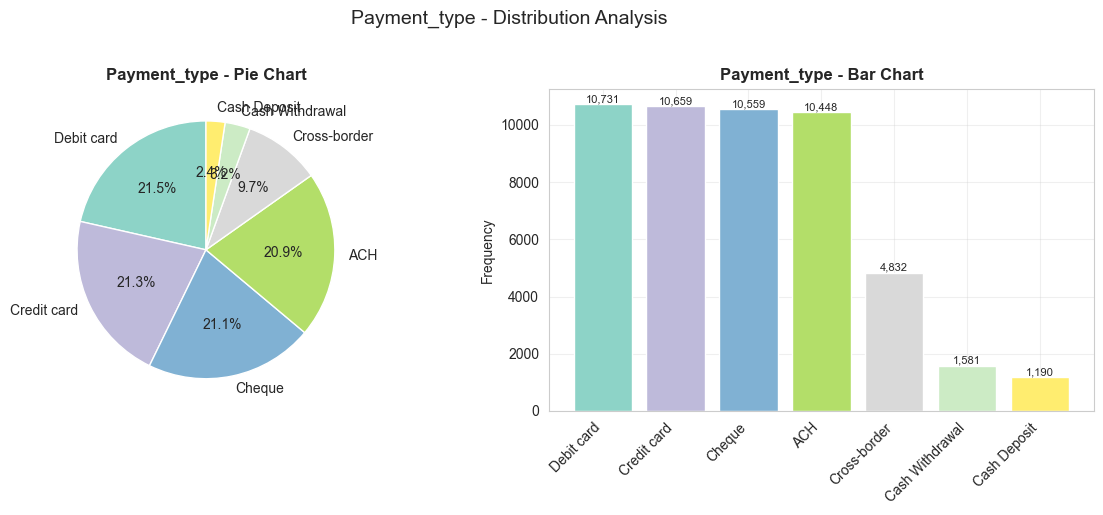

\n📊 Medium cardinality variables (10-50 categories): ['Payment_currency', 'Received_currency', 'Sender_bank_location', 'Receiver_bank_location', 'Laundering_type']


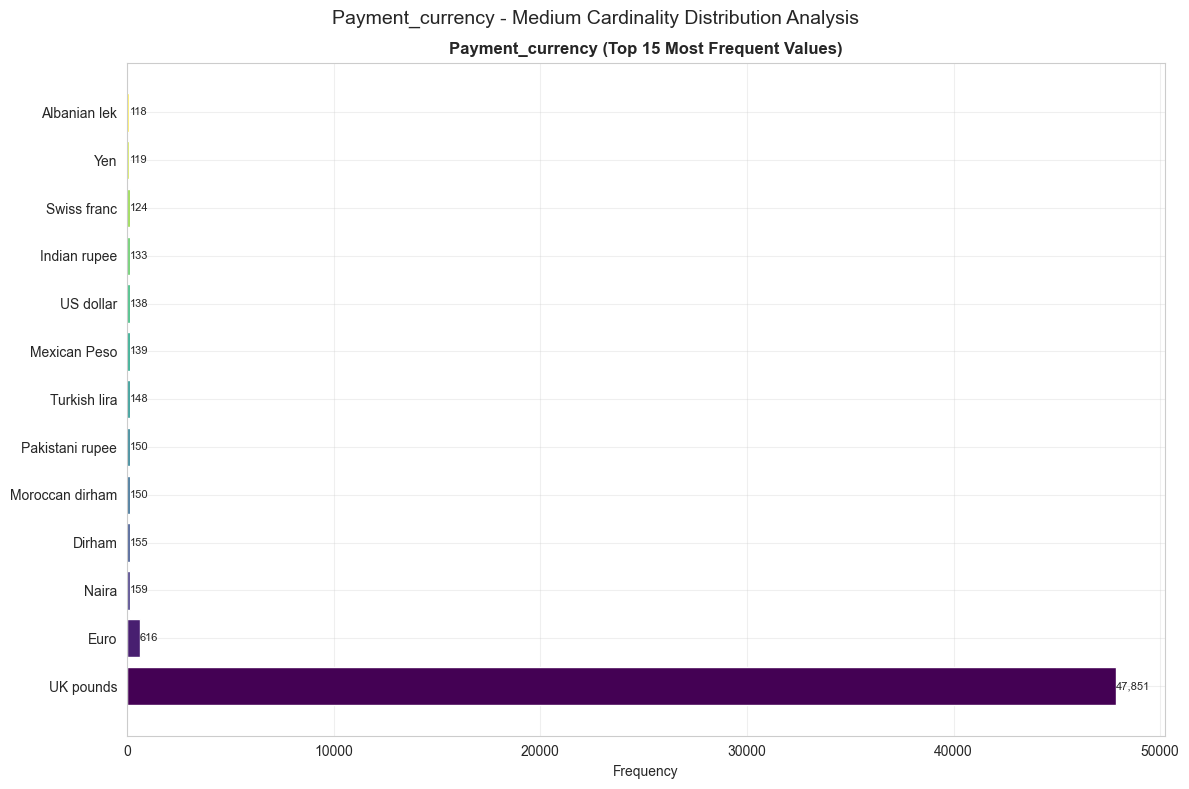

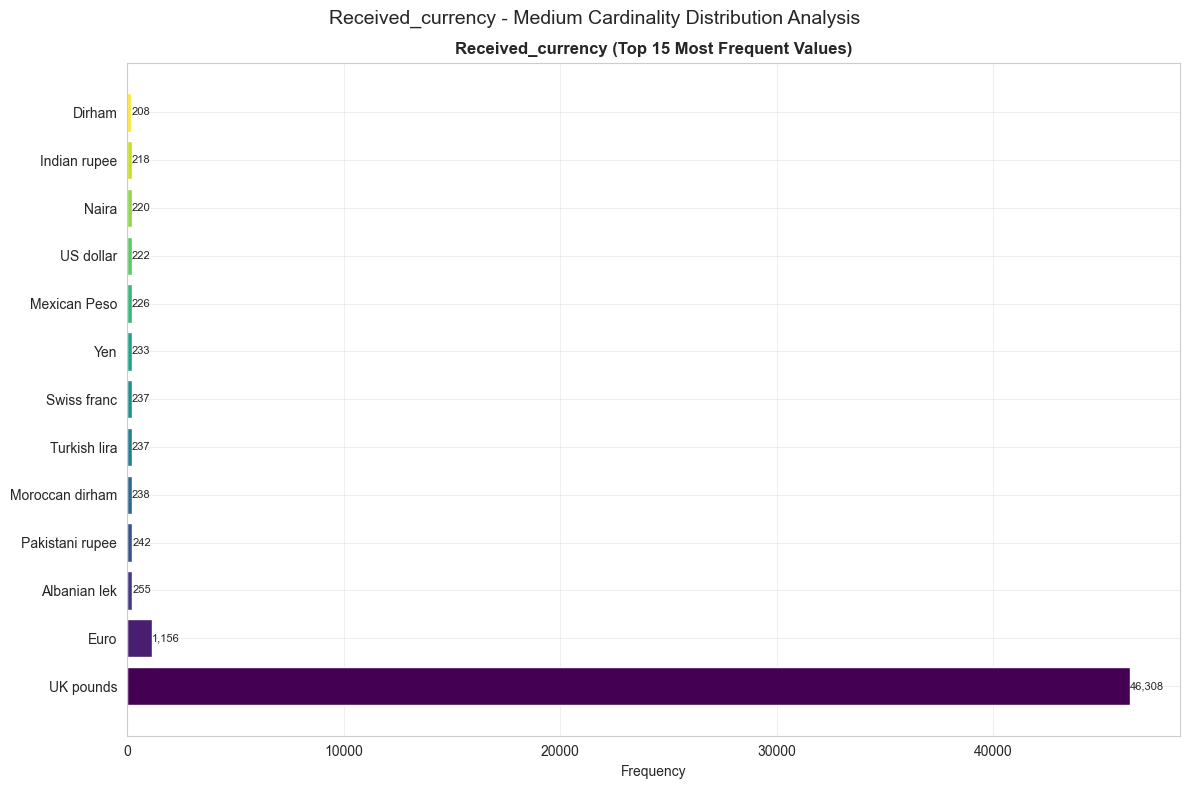

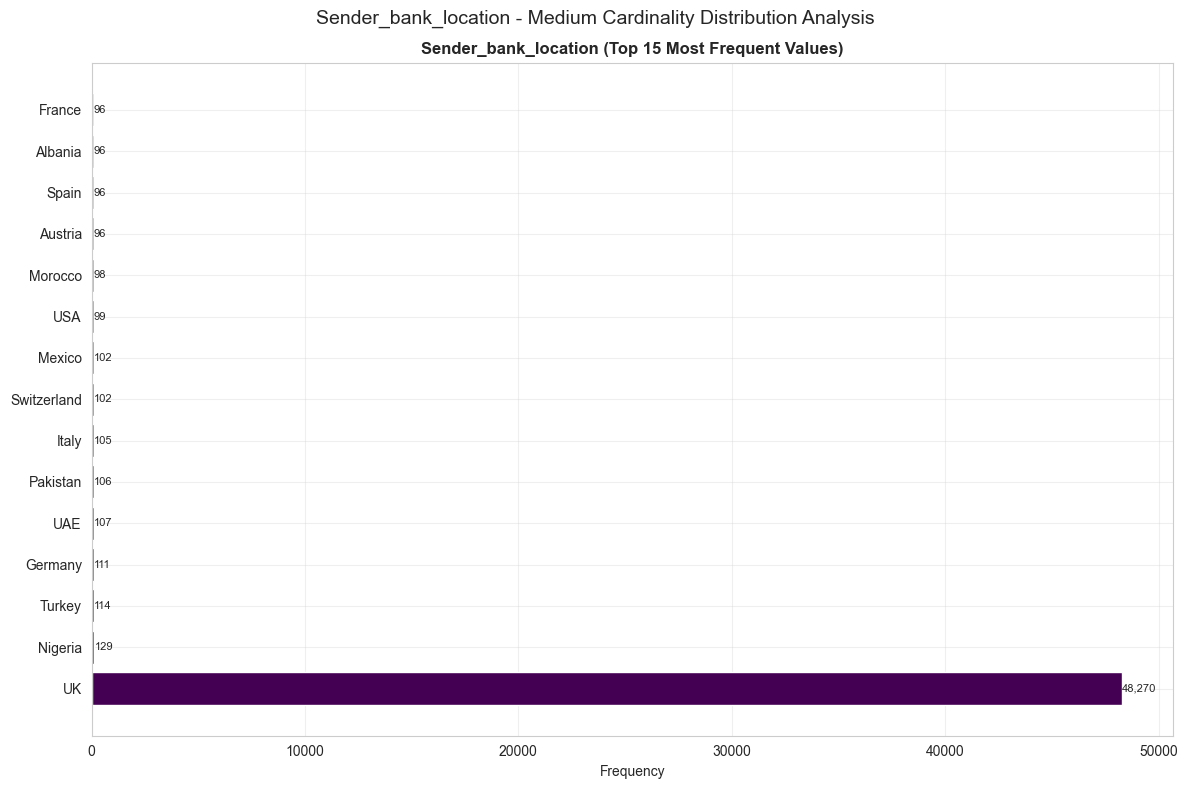

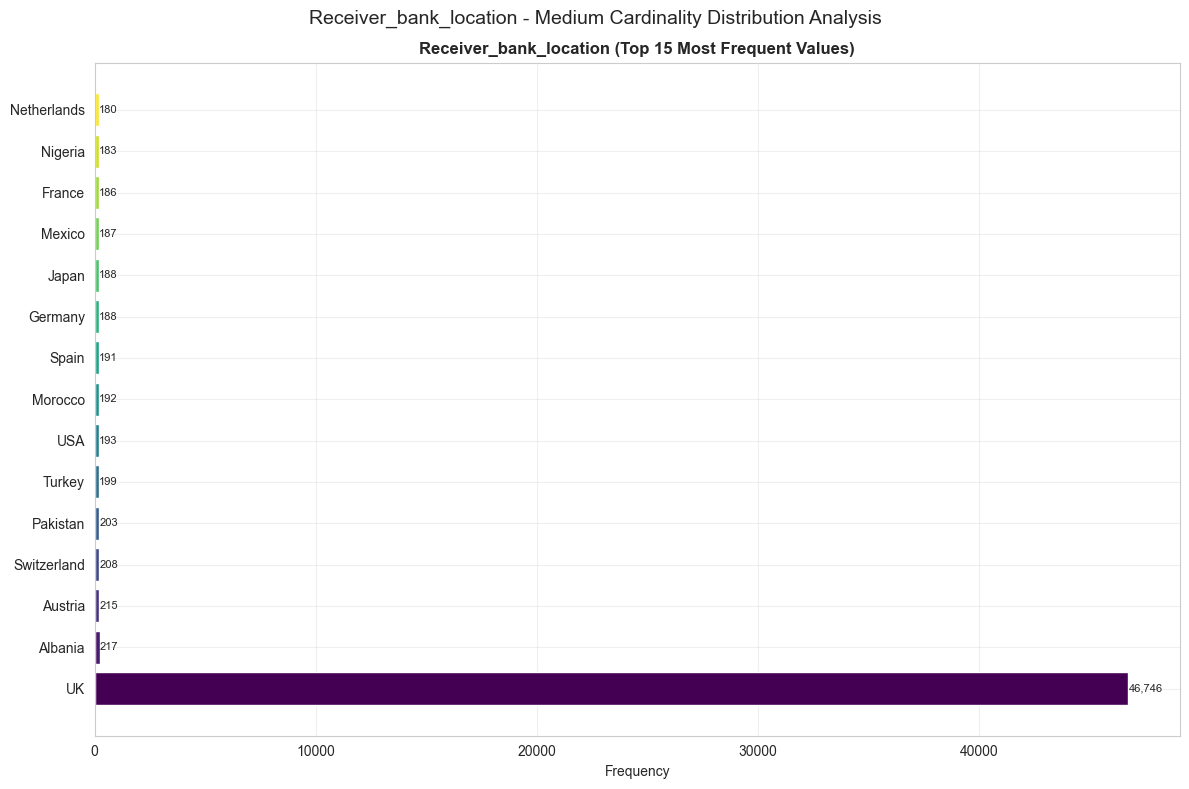

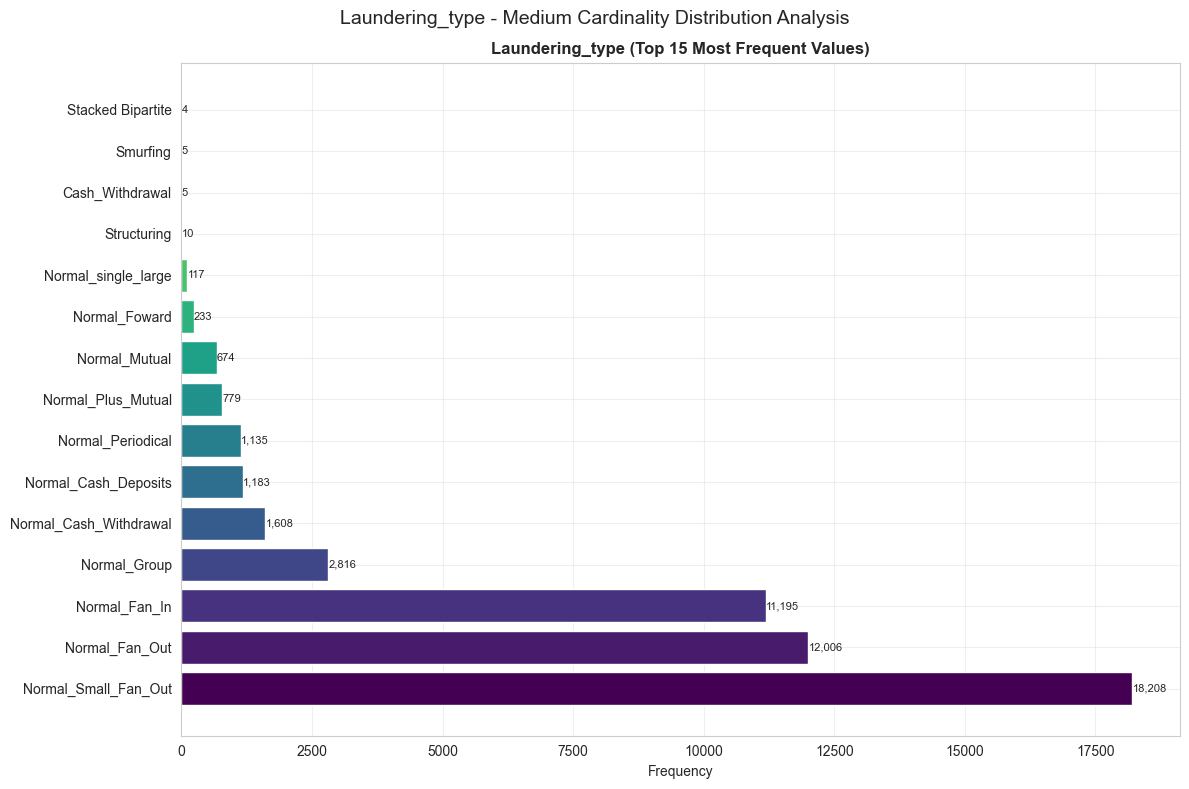

\n📊 High cardinality variables (>50 categories): ['Time', 'Date']
\nAnalyzing variable: Time


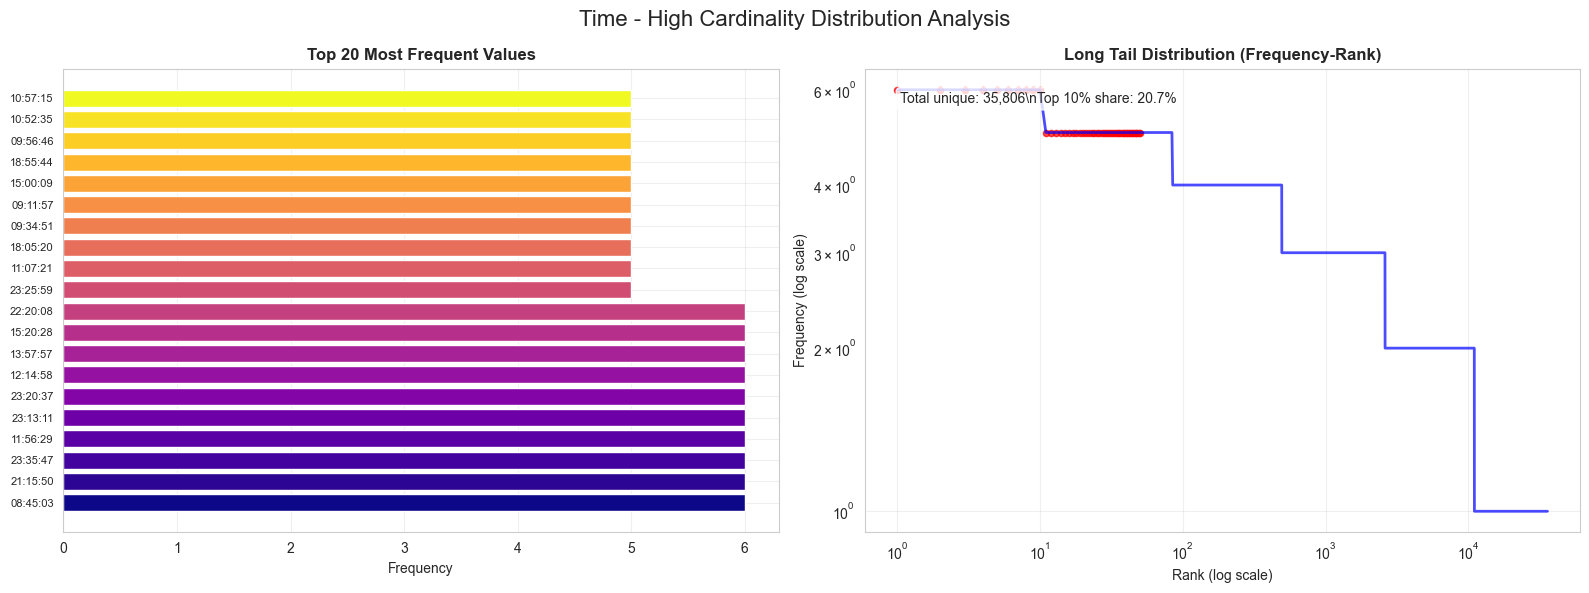

\nAnalyzing variable: Date


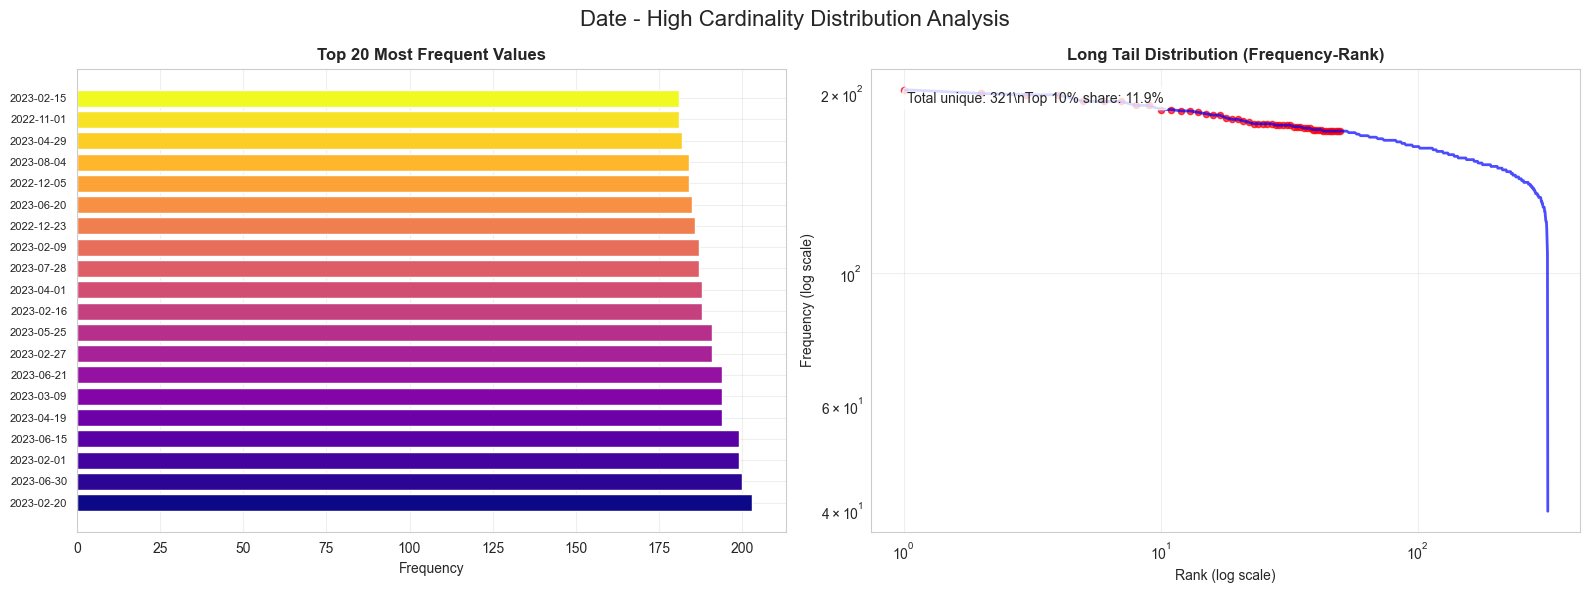

In [ ]:
# Categorical variable visualization (fixed version)
print("\\n" + "="*70)
print("                 Categorical Variable Distribution Visualization")
print("="*70)

def plot_categorical_distributions_fixed(df_data, columns, sample_size=50000):
    """Plot categorical variable distribution charts (fixed version)"""

    # Data sampling
    if len(df_data) > sample_size:
        df_plot = df_data.sample(n=sample_size, random_state=42)
        print(f"To improve plotting performance, sampling {sample_size:,} rows for visualization")
    else:
        df_plot = df_data.copy()

    # Group by category count
    low_cardinality = []  # <10 categories
    medium_cardinality = []  # 10-50 categories
    high_cardinality = []  # >50 categories

    for col in columns:
        if col in df_plot.columns:
            unique_count = df_plot[col].nunique()
            if unique_count < 10:
                low_cardinality.append(col)
            elif unique_count < 50:
                medium_cardinality.append(col)
            else:
                high_cardinality.append(col)

    # Plot low cardinality variables (pie chart + bar chart)
    if low_cardinality:
        print(f"\\n📊 Low cardinality variables (<10 categories): {low_cardinality}")

        # Create a pair of subplots for each variable (pie chart + bar chart)
        for idx, col in enumerate(low_cardinality):
            fig, (ax_pie, ax_bar) = plt.subplots(1, 2, figsize=(12, 5))
            fig.suptitle(f'{col} - Distribution Analysis', fontsize=14, y=1.02)

            value_counts = df_plot[col].value_counts()
            colors = plt.cm.Set3(np.linspace(0, 1, len(value_counts)))

            # Pie chart
            wedges, texts, autotexts = ax_pie.pie(value_counts.values,
                                                 labels=value_counts.index,
                                                 autopct='%1.1f%%',
                                                 colors=colors,
                                                 startangle=90)
            ax_pie.set_title(f'{col} - Pie Chart', fontweight='bold')

            # Bar chart
            bars = ax_bar.bar(range(len(value_counts)), value_counts.values,
                             color=colors[:len(value_counts)])
            ax_bar.set_xticks(range(len(value_counts)))
            ax_bar.set_xticklabels(value_counts.index, rotation=45, ha='right')
            ax_bar.set_ylabel('Frequency')
            ax_bar.set_title(f'{col} - Bar Chart', fontweight='bold')
            ax_bar.grid(True, alpha=0.3)

            # Add value labels
            for j, bar in enumerate(bars):
                height = bar.get_height()
                ax_bar.text(bar.get_x() + bar.get_width()/2., height,
                           f'{int(height):,}',
                           ha='center', va='bottom', fontsize=8)

            plt.tight_layout()
            plt.show()

    # Plot medium cardinality variables (top 15 most frequent values)
    if medium_cardinality:
        print(f"\\n📊 Medium cardinality variables (10-50 categories): {medium_cardinality}")

        for col in medium_cardinality:
            fig, ax = plt.subplots(1, 1, figsize=(12, 8))
            fig.suptitle(f'{col} - Medium Cardinality Distribution Analysis', fontsize=14, y=0.98)

            value_counts = df_plot[col].value_counts().head(15)

            bars = ax.barh(range(len(value_counts)), value_counts.values,
                          color=plt.cm.viridis(np.linspace(0, 1, len(value_counts))))
            ax.set_yticks(range(len(value_counts)))
            ax.set_yticklabels(value_counts.index)
            ax.set_xlabel('Frequency')
            ax.set_title(f'{col} (Top 15 Most Frequent Values)', fontweight='bold')
            ax.grid(True, alpha=0.3)

            # Add value labels
            for j, bar in enumerate(bars):
                width = bar.get_width()
                ax.text(width, bar.get_y() + bar.get_height()/2.,
                       f'{int(width):,}',
                       ha='left', va='center', fontsize=8)

            plt.tight_layout()
            plt.show()

    # Plot high cardinality variables (top 20 most frequent values + long tail distribution)
    if high_cardinality:
        print(f"\\n📊 High cardinality variables (>50 categories): {high_cardinality}")

        for col in high_cardinality:
            if col in df_plot.columns:
                print(f"\\nAnalyzing variable: {col}")

                fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
                fig.suptitle(f'{col} - High Cardinality Distribution Analysis', fontsize=16, y=0.98)

                value_counts = df_plot[col].value_counts()

                # Left plot: top 20 most frequent values
                top_20 = value_counts.head(20)
                bars1 = ax1.barh(range(len(top_20)), top_20.values,
                               color=plt.cm.plasma(np.linspace(0, 1, len(top_20))))
                ax1.set_yticks(range(len(top_20)))
                ax1.set_yticklabels(top_20.index, fontsize=8)
                ax1.set_xlabel('Frequency')
                ax1.set_title(f'Top 20 Most Frequent Values', fontweight='bold')
                ax1.grid(True, alpha=0.3)

                # Right plot: Long tail distribution (frequency ranking)
                rank = np.arange(1, len(value_counts) + 1)
                ax2.loglog(rank, value_counts.values, 'b-', alpha=0.7, linewidth=2)
                ax2.scatter(rank[:50], value_counts.values[:50], c='red', s=20, alpha=0.7)
                ax2.set_xlabel('Rank (log scale)')
                ax2.set_ylabel('Frequency (log scale)')
                ax2.set_title('Long Tail Distribution (Frequency-Rank)', fontweight='bold')
                ax2.grid(True, alpha=0.3)

                # Add statistical information
                total_unique = len(value_counts)
                top_10_percent = value_counts.head(int(total_unique * 0.1)).sum() / value_counts.sum() * 100
                info_text = f'Total unique: {total_unique:,}\\nTop 10% share: {top_10_percent:.1f}%'
                ax2.text(0.05, 0.95, info_text, transform=ax2.transAxes,
                        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

                plt.tight_layout()
                plt.show()

# Execute visualization (using fixed version)
plot_categorical_distributions_fixed(df_sample, categorical_columns)


In [ ]:
# Generate data distribution analysis summary report
print("\\n" + "="*80)
print("                    Data Distribution Analysis Summary Report")
print("="*80)

# Numeric variable summary
print("\\n📊 Numeric Variable Analysis Summary:")
print("-" * 50)

# Check data structure
print("Checking distribution_analysis data structure:")
for key, value in distribution_analysis.items():
    print(f"{key}: {len(value)} fields - {list(value.keys())}")

num_summary = pd.DataFrame(distribution_analysis).T
print(f"\\nDataFrame shape: {num_summary.shape}")
print(f"Number of columns: {len(num_summary.columns)}")

# Set column names based on actual column count
if len(num_summary.columns) == 7:
    num_summary.columns = ['Mean', 'Median', 'Std_Dev', 'Skewness', 'Kurtosis', 'Outlier_Percentage(%)', 'Transform_Needed']
elif len(num_summary.columns) == 6:
    num_summary.columns = ['Mean', 'Median', 'Std_Dev', 'Skewness', 'Kurtosis', 'Outlier_Percentage(%)']
else:
    print(f"Unexpected column count: {len(num_summary.columns)}")
    print("Using default column names")

num_summary = num_summary.round(3)
print(num_summary)

# Categorical variable summary
print("\\n📊 Categorical Variable Analysis Summary:")
print("-" * 50)

# Check categorical data structure
if categorical_analysis:
    print("Checking categorical_analysis data structure:")
    for key, value in categorical_analysis.items():
        print(f"{key}: {len(value)} fields - {list(value.keys())}")

    cat_summary = pd.DataFrame(categorical_analysis).T
    print(f"\\nCategorical DataFrame shape: {cat_summary.shape}")
    print(f"Number of columns: {len(cat_summary.columns)}")

    # Set column names based on actual column count
    if len(cat_summary.columns) == 5:
        cat_summary.columns = ['Unique_Count', 'Gini_Coefficient', 'Dominant_Category_Percentage(%)', 'Missing_Percentage(%)', 'Distribution_Type']
    elif len(cat_summary.columns) == 4:
        cat_summary.columns = ['Unique_Count', 'Gini_Coefficient', 'Dominant_Category_Percentage(%)', 'Missing_Percentage(%)']
    else:
        print(f"Unexpected column count: {len(cat_summary.columns)}")
        print("Using default column names")

    cat_summary = cat_summary.round(3)
    print(cat_summary)
else:
    print("No categorical variable analysis data")

# Transformation recommendations summary
print("\\n🔧 Numeric Variable Transformation Recommendations Summary:")
print("-" * 50)
if distribution_analysis:
    for col, analysis in distribution_analysis.items():
        if 'skewness' in analysis:
            skew = analysis['skewness']
            if abs(skew) < 0.5:
                suggestion = "✅ No transformation needed (normal distribution)"
            elif skew > 1:
                suggestion = "🔄 Recommend log or Box-Cox transformation (strongly right-skewed)"
            elif skew < -1:
                suggestion = "🔄 Recommend square transformation (strongly left-skewed)"
            else:
                suggestion = "🔄 Consider square root transformation (mildly skewed)"

            print(f"  • {col}: {suggestion} (Skewness: {skew:.3f})")
        else:
            print(f"  • {col}: Analysis data incomplete")
else:
    print("No numeric variable analysis data")

# Encoding recommendations summary
print("\\n🔧 Categorical Variable Encoding Recommendations Summary:")
print("-" * 50)
if categorical_analysis:
    for col, analysis in categorical_analysis.items():
        if 'unique_count' in analysis:
            unique_count = analysis['unique_count']
            if unique_count == 1:
                suggestion = "❌ Recommend deletion (constant variable)"
            elif unique_count == 2:
                suggestion = "📋 Label encoding or binary encoding"
            elif unique_count < 10:
                suggestion = "📋 One-hot encoding or label encoding"
            elif unique_count < 50:
                suggestion = "📋 Target encoding or frequency encoding"
            else:
                suggestion = "📋 Frequency encoding, target encoding, or embedding layer"

            print(f"  • {col}: {suggestion} ({unique_count} unique values)")
        else:
            print(f"  • {col}: Analysis data incomplete")
else:
    print("No categorical variable analysis data")

# Data quality issues summary
print("\\n⚠️  Data Quality Issues Summary:")
print("-" * 50)

quality_issues = []

# Check numeric variable issues
if distribution_analysis:
    for col, analysis in distribution_analysis.items():
        try:
            if 'outlier_percentage' in analysis and analysis['outlier_percentage'] > 5:
                quality_issues.append(f"• {col}: High outlier percentage ({analysis['outlier_percentage']:.1f}%)")
            if 'skewness' in analysis and abs(analysis['skewness']) > 2:
                quality_issues.append(f"• {col}: Severely skewed distribution (Skewness: {analysis['skewness']:.3f})")
        except Exception as e:
            print(f"Error checking {col}: {e}")

# Check categorical variable issues
if categorical_analysis:
    for col, analysis in categorical_analysis.items():
        try:
            if 'unique_count' in analysis and analysis['unique_count'] == 1:
                quality_issues.append(f"• {col}: Constant variable (all values identical)")
            elif 'top1_percent' in analysis and analysis['top1_percent'] > 95:
                quality_issues.append(f"• {col}: Extremely uneven distribution (Dominant category: {analysis['top1_percent']:.1f}%)")
            elif 'missing_percent' in analysis and analysis['missing_percent'] > 10:
                quality_issues.append(f"• {col}: High missing values ({analysis['missing_percent']:.1f}%)")
        except Exception as e:
            print(f"Error checking {col}: {e}")

if quality_issues:
    for issue in quality_issues:
        print(issue)
else:
    print("✅ No obvious data quality issues found")

print("\\n" + "="*80)
print("                           Analysis Complete")
print("="*80)
print("\\n💡 Recommended Next Steps:")
print("  1. Apply appropriate transformations to numeric variables based on skewness analysis")
print("  2. Choose suitable categorical variable encoding methods based on cardinality and distribution")
print("  3. Address identified data quality issues")
print("  4. Proceed with feature engineering and model training")

# Save analysis results
try:
    # Save to CSV files
    if 'num_summary' in locals() and not num_summary.empty:
        num_summary.to_csv('numeric_distribution_analysis.csv', encoding='utf-8')
        print("\\n💾 Numeric variable analysis results saved to: numeric_distribution_analysis.csv")

    if 'cat_summary' in locals() and not cat_summary.empty:
        cat_summary.to_csv('categorical_distribution_analysis.csv', encoding='utf-8')
        print("💾 Categorical variable analysis results saved to: categorical_distribution_analysis.csv")

    # Save quality issues report
    if quality_issues:
        with open('data_quality_issues.txt', 'w', encoding='utf-8') as f:
            f.write("Data Quality Issues Summary\\n")
            f.write("=" * 40 + "\\n")
            for issue in quality_issues:
                f.write(issue + "\\n")
        print("💾 Data quality issues report saved to: data_quality_issues.txt")

except Exception as e:
    print(f"Error saving files: {e}")


\n================================================================================
                    Data Distribution Analysis Summary Report
\n📊 Numeric Variable Analysis Summary:
--------------------------------------------------
Checking distribution_analysis data structure:
Sender_account: 6 fields - ['mean', 'median', 'std', 'skewness', 'kurtosis', 'transform_needed']
Receiver_account: 6 fields - ['mean', 'median', 'std', 'skewness', 'kurtosis', 'transform_needed']
Amount: 6 fields - ['mean', 'median', 'std', 'skewness', 'kurtosis', 'transform_needed']
\nDataFrame shape: (3, 6)
Number of columns: 6
                              Mean        Median            Std_Dev  Skewness  \
Sender_account    4992191898.01067  4988131539.0  2892275298.463311  0.005829   
Receiver_account  4999684385.63641  4983521677.5  2887858771.256755  0.002546   
Amount                 7386.011015      6154.435        6173.834531  0.953129   

                  Kurtosis Outlier_Percentage(%)  
Sender_acc